**Objective**

* To perform exploratory data analysis on Sachin's batting dataset to analyse and find insights about the ODI and Test batting trends.

* To apply predictive analaysis on Sachin's batting dataset to predict the number of runs he would score given the relevant independent variable(s).

* To improverish on the predictive model developed from the above study and deploy the model into a python program which would predict the number of runs, fours and sixes a batsman would hit if he faces a specified number of deliveries in any format that he played.

**Techniques Applied**

* Data Scrapping 
* Data Manipulation
* Data Cleaning
* Data Exploration
* Data Visualization 
* Model Selection
* Model Training 
* Model Testing
* Model Evaluation
* Model Deployment

**List of contents**

   Section I - Data Preparaion
    
        * Importing required libraries
        * Web scraping
        * Reading the dataset
        * Renaming the columns
        * Changing the column datatypes
        * Treating the null values and wrong enteries
        * Creating new columns required
        * Dropping the columns not required
        
   Section II - Exploratory Data Analysis
     
         * Scope
         * Overall performances
         * Performances against different teams
         * Performances over the years
         * Performances in different countries
         
   Section III - Predictive Analysis
     
         * Scope
         * Problem statement and selecting independent vairable(s) 
         * Spliting the dataset into training and testing sets
         * Spliting the training set for training and validating
         * Selecting the best model through fitting, testing and evaluation
         * Tuning the model for further improvement 
         * Testing the model approach on new dataset
         
   Section IV - Model Deployment
   
         * Defining the scope
         * Deployment of model as python program with user input variables
         * Deployment of model as python function
         * Testing the function with multiple inputs

**Section I: Data Preparation**

**Importing required libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import plotly.express as px
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

**Data Scraping**

Two datasets are used for EDA. One dataset contains innings by innings details of Sachin ODI batting innings and the other test innings. Both these datasets are scraped from cricinfo statsguru webpage from the following two URLs:
https://stats.espncricinfo.com/ci/engine/player/35320.html?class=1;template=results;type=batting;view=innings and https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings

pandas.read_html function was used to scrap the tables from the webpage from which the required table was obtained and saved as csv files using pandas.to_csv function.

**Reading the datasets**

In [9]:
#reading csv files
innO = pd.read_csv('SachinODI.csv')
innT = pd.read_csv('SachinTest.csv')

In [10]:
print(innO.shape)
innO.head(3)

(463, 15)


Unnamed: 0 Runs Mins  BF 4s 6s     SR Pos Dismissal Inns  Unnamed: 9  \
0           0    0    -   2  0  0   0.00   5    caught    2         NaN   
1           1    0    2   2  0  0   0.00   5    caught    2         NaN   
2           2   36   51  39  5  0  92.30   6    caught    1         NaN   

      Opposition      Ground   Start Date Unnamed: 13  
0     v Pakistan  Gujranwala  18 Dec 1989   ODI # 593  
1  v New Zealand     Dunedin   1 Mar 1990   ODI # 612  
2  v New Zealand  Wellington   6 Mar 1990   ODI # 616

In [11]:
print(innT.shape)
innT.head(3)

(347, 15)


Unnamed: 0 Runs Mins   BF 4s 6s     SR Pos Dismissal Inns  Unnamed: 9  \
0           0   15   28   24  2  0  62.50   6    bowled    2         NaN   
1           1  DNB    -    -  -  -      -   -         -    4         NaN   
2           2   59  254  172  4  0  34.30   6       lbw    1         NaN   

   Opposition      Ground   Start Date  Unnamed: 13  
0  v Pakistan     Karachi  15 Nov 1989  Test # 1127  
1  v Pakistan     Karachi  15 Nov 1989  Test # 1127  
2  v Pakistan  Faisalabad  23 Nov 1989  Test # 1128

ODI dataset has 463 rows and 15 columns while Test dataset has 347 rows and 15 columns detailing details of each innings that Sachin played in ODIs and Tests

**Renaming the columns**

Renaming the columns to access the columns with simpler names

In [12]:
#renaming the columns
innO.columns = ['na','runs','mins','balls','4s','6s','srate','position','dismissal','inns','na1','opposition','ground','date','matchNo']
innO.head(3)

na runs mins balls 4s 6s  srate position dismissal inns  na1  \
0   0    0    -     2  0  0   0.00        5    caught    2  NaN   
1   1    0    2     2  0  0   0.00        5    caught    2  NaN   
2   2   36   51    39  5  0  92.30        6    caught    1  NaN   

      opposition      ground         date    matchNo  
0     v Pakistan  Gujranwala  18 Dec 1989  ODI # 593  
1  v New Zealand     Dunedin   1 Mar 1990  ODI # 612  
2  v New Zealand  Wellington   6 Mar 1990  ODI # 616

In [13]:
innT.columns = ['na','runs','mins','balls','4s','6s','srate','position','dismissal','inns','na1','opposition','ground','date','matchNo']
innT.head(3)

na runs mins balls 4s 6s  srate position dismissal inns  na1  opposition  \
0   0   15   28    24  2  0  62.50        6    bowled    2  NaN  v Pakistan   
1   1  DNB    -     -  -  -      -        -         -    4  NaN  v Pakistan   
2   2   59  254   172  4  0  34.30        6       lbw    1  NaN  v Pakistan   

       ground         date      matchNo  
0     Karachi  15 Nov 1989  Test # 1127  
1     Karachi  15 Nov 1989  Test # 1127  
2  Faisalabad  23 Nov 1989  Test # 1128

**Data Cleaning**

In [14]:
#changing data type of the date column to datetime to extract year and month in separate columns
innO['date'] = pd.to_datetime(innO['date'])
innO['month'] = innO.date.dt.month_name().str[:3]
innO['year'] = innO['date'].dt.year
#since date column not required, dropping it
innO.drop('date', axis=1,inplace=True)
innO.head(3)

na runs mins balls 4s 6s  srate position dismissal inns  na1  \
0   0    0    -     2  0  0   0.00        5    caught    2  NaN   
1   1    0    2     2  0  0   0.00        5    caught    2  NaN   
2   2   36   51    39  5  0  92.30        6    caught    1  NaN   

      opposition      ground    matchNo month  year  
0     v Pakistan  Gujranwala  ODI # 593   Dec  1989  
1  v New Zealand     Dunedin  ODI # 612   Mar  1990  
2  v New Zealand  Wellington  ODI # 616   Mar  1990

In [15]:
innT['date'] = pd.to_datetime(innT['date'])
innT['month'] = innT.date.dt.month_name().str[:3]
innT['year'] = innT['date'].dt.year
innT.drop('date', axis=1,inplace=True)
innT.head(3)

na runs mins balls 4s 6s  srate position dismissal inns  na1  opposition  \
0   0   15   28    24  2  0  62.50        6    bowled    2  NaN  v Pakistan   
1   1  DNB    -     -  -  -      -        -         -    4  NaN  v Pakistan   
2   2   59  254   172  4  0  34.30        6       lbw    1  NaN  v Pakistan   

       ground      matchNo month  year  
0     Karachi  Test # 1127   Nov  1989  
1     Karachi  Test # 1127   Nov  1989  
2  Faisalabad  Test # 1128   Nov  1989

In [16]:
##printing the unique values in each column to look at the data range and to detrimine cleaning operatoin
for col in innO.columns:
    print (col, innO[col].unique())

na [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

In [17]:
for col in innT.columns:
    print (col, innT[col].unique())

na [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

In [18]:
#na column contains just the copy of index column and na1 contains only null values. mins columns has so many non enteries and also not required for the analysis. So dropping them
innO.drop(['na','na1','mins'],axis=1,inplace = True)
innO.head(3)

runs balls 4s 6s  srate position dismissal inns     opposition      ground  \
0    0     2  0  0   0.00        5    caught    2     v Pakistan  Gujranwala   
1    0     2  0  0   0.00        5    caught    2  v New Zealand     Dunedin   
2   36    39  5  0  92.30        6    caught    1  v New Zealand  Wellington   

     matchNo month  year  
0  ODI # 593   Dec  1989  
1  ODI # 612   Mar  1990  
2  ODI # 616   Mar  1990

In [19]:
innT.drop(['na','na1','mins'],axis=1,inplace = True)
innT.head(3)

runs balls 4s 6s  srate position dismissal inns  opposition      ground  \
0   15    24  2  0  62.50        6    bowled    2  v Pakistan     Karachi   
1  DNB     -  -  -      -        -         -    4  v Pakistan     Karachi   
2   59   172  4  0  34.30        6       lbw    1  v Pakistan  Faisalabad   

       matchNo month  year  
0  Test # 1127   Nov  1989  
1  Test # 1127   Nov  1989  
2  Test # 1128   Nov  1989

In [20]:
#whenever sachin remained not out, the runs column has values suffixed with *. 
#Performing list comprehension for removing it and also accounting for not outs in a separate column
innO['notout'] = [1 if str(run)[-1] == '*' else 0 for run in innO.runs]
innO['runs'] = [str(run)[:-1] if str(run)[-1] == '*' else run for run in innO.runs]
#whenever Sachin did not bat or the team did not bat, we have DNB and TDNB enteries in runs column
#As these rows do not have any values, dropping the rows containing DNB and TDNB
drop_rows = innO[(innO.runs == 'TDNB') | (innO.runs == 'DNB')].index
innO.drop(drop_rows, inplace=True)
print(innO.shape)
innO.head(3)

(452, 14)


runs balls 4s 6s  srate position dismissal inns     opposition      ground  \
0    0     2  0  0   0.00        5    caught    2     v Pakistan  Gujranwala   
1    0     2  0  0   0.00        5    caught    2  v New Zealand     Dunedin   
2   36    39  5  0  92.30        6    caught    1  v New Zealand  Wellington   

     matchNo month  year  notout  
0  ODI # 593   Dec  1989       0  
1  ODI # 612   Mar  1990       0  
2  ODI # 616   Mar  1990       0

In [21]:
innT['notout'] = [1 if str(run)[-1] == '*' else 0 for run in innT.runs]
innT['runs'] = [str(run)[:-1] if str(run)[-1] == '*' else run for run in innT.runs]
drop_rows = innT[(innT.runs == 'TDNB') | (innT.runs == 'DNB')].index
innT.drop(drop_rows, inplace=True)
print(innT.shape)
innT.head(3)

(329, 14)


runs balls 4s 6s  srate position dismissal inns  opposition      ground  \
0   15    24  2  0  62.50        6    bowled    2  v Pakistan     Karachi   
2   59   172  4  0  34.30        6       lbw    1  v Pakistan  Faisalabad   
3    8    16  1  0  50.00        6   run out    3  v Pakistan  Faisalabad   

       matchNo month  year  notout  
0  Test # 1127   Nov  1989       0  
2  Test # 1128   Nov  1989       0  
3  Test # 1128   Nov  1989       0

In [22]:
#opposition column has enteries prefixed with v. Removing them through
innO['opposition'] = [country[2:] for country in innO.opposition]
innO.head(3)

runs balls 4s 6s  srate position dismissal inns   opposition      ground  \
0    0     2  0  0   0.00        5    caught    2     Pakistan  Gujranwala   
1    0     2  0  0   0.00        5    caught    2  New Zealand     Dunedin   
2   36    39  5  0  92.30        6    caught    1  New Zealand  Wellington   

     matchNo month  year  notout  
0  ODI # 593   Dec  1989       0  
1  ODI # 612   Mar  1990       0  
2  ODI # 616   Mar  1990       0

In [23]:
innT['opposition'] = [country[2:] for country in innT.opposition]
innT.head(3)

runs balls 4s 6s  srate position dismissal inns opposition      ground  \
0   15    24  2  0  62.50        6    bowled    2   Pakistan     Karachi   
2   59   172  4  0  34.30        6       lbw    1   Pakistan  Faisalabad   
3    8    16  1  0  50.00        6   run out    3   Pakistan  Faisalabad   

       matchNo month  year  notout  
0  Test # 1127   Nov  1989       0  
2  Test # 1128   Nov  1989       0  
3  Test # 1128   Nov  1989       0

In [24]:
#match no columns has prefix of ODI # before the values. Removing them 
innO['matchNo'] = [str(num)[5:] for num in innO.matchNo]
innO.head(3)

runs balls 4s 6s  srate position dismissal inns   opposition      ground  \
0    0     2  0  0   0.00        5    caught    2     Pakistan  Gujranwala   
1    0     2  0  0   0.00        5    caught    2  New Zealand     Dunedin   
2   36    39  5  0  92.30        6    caught    1  New Zealand  Wellington   

  matchNo month  year  notout  
0     593   Dec  1989       0  
1     612   Mar  1990       0  
2     616   Mar  1990       0

In [25]:
innT['matchNo'] = [str(num)[7:] for num in innT.matchNo]
innT.head(3)

runs balls 4s 6s  srate position dismissal inns opposition      ground  \
0   15    24  2  0  62.50        6    bowled    2   Pakistan     Karachi   
2   59   172  4  0  34.30        6       lbw    1   Pakistan  Faisalabad   
3    8    16  1  0  50.00        6   run out    3   Pakistan  Faisalabad   

  matchNo month  year  notout  
0    1127   Nov  1989       0  
2    1128   Nov  1989       0  
3    1128   Nov  1989       0

In [26]:
#checking the null values
innO.isna().sum(), innT.isna().sum()

(runs          0
 balls         0
 4s            0
 6s            0
 srate         0
 position      0
 dismissal     0
 inns          0
 opposition    0
 ground        0
 matchNo       0
 month         0
 year          0
 notout        0
 dtype: int64,
 runs          0
 balls         0
 4s            0
 6s            0
 srate         0
 position      0
 dismissal     0
 inns          0
 opposition    0
 ground        0
 matchNo       0
 month         0
 year          0
 notout        0
 dtype: int64)

In [27]:
#checking data types to see if they require conversion
innO.dtypes, innT.dtypes

(runs          object
 balls         object
 4s            object
 6s            object
 srate         object
 position      object
 dismissal     object
 inns          object
 opposition    object
 ground        object
 matchNo       object
 month         object
 year           int64
 notout         int64
 dtype: object,
 runs          object
 balls         object
 4s            object
 6s            object
 srate         object
 position      object
 dismissal     object
 inns          object
 opposition    object
 ground        object
 matchNo       object
 month         object
 year           int64
 notout         int64
 dtype: object)

In [28]:
#runs, balls, 6s, 4s, matchNo are essentially integers and srate(strike rate) is a float.
#all these are object data types in the dataset which are converted using loop operation
for col in ['runs','balls','6s','4s','matchNo']:
    innO[col] = innO[col].astype('int')
innO['srate'] = innO['srate'].astype('float')
innO['year'] = innO['year'].astype('object')
innO.dtypes

runs            int32
balls           int32
4s              int32
6s              int32
srate         float64
position       object
dismissal      object
inns           object
opposition     object
ground         object
matchNo         int32
month          object
year           object
notout          int64
dtype: object

In [29]:
for col in ['runs','balls','6s','4s','matchNo']:
    print(innT[col].unique())

['15' '59' '8' '41' '35' '57' '0' '24' '88' '5' '10' '27' '68' '119' '21'
 '11' '16' '7' '40' '148' '6' '17' '114' '111' '1' '73' '50' '9' '165'
 '78' '62' '28' '104' '71' '142' '96' '43' '34' '85' '179' '54' '4' '52'
 '2' '122' '31' '177' '74' '42' '18' '61' '36' '169' '92' '83' '143' '139'
 '23' '13' '155' '79' '47' '113' '67' '136' '29' '53' '124' '126' '44'
 '217' '116' '45' '97' '20' '39' '201' '76' '65' '69' '22' '103' '26' '90'
 '176' '117' '86' '12' '193' '51' '32' '55' '37' '241' '60' '194' '3'
 '248' '94' '109' '19' '14' '63' '64' '101' '91' '82' '56' '154' '153'
 '49' '160' '100' '105' '106' '84' '203' '98' '38' '214' '146' '80' '25'
 '81']
['24' '172' '16' '90' '51' '134' '1' '44' '266' '13' '19' '65' '136' '189'
 '30' '-' '42' '25' '23' '107' '213' '8' '29' '161' '9' '3' '270' '5' '17'
 '208' '118' '296' '114' '52' '152' '224' '140' '14' '47' '43' '130' '322'
 '138' '55' '4' '0' '88' '41' '177' '59' '360' '97' '11' '7' '64' '33'
 '62' '173' '98' '45' '254' '28' '36' '233' 

In [30]:
innT[innT['balls'] == '-'], innT[innT['4s'] == '-']

(   runs balls 4s 6s srate position dismissal inns opposition      ground  \
 17   11     -  -  0     -        6       lbw    1  Sri Lanka  Chandigarh   
 
    matchNo month  year  notout  
 17    1156   Nov  1990       0  ,
    runs balls 4s 6s srate position dismissal inns opposition      ground  \
 17   11     -  -  0     -        6       lbw    1  Sri Lanka  Chandigarh   
 
    matchNo month  year  notout  
 17    1156   Nov  1990       0  )

In [31]:
innT['balls'] = innT['balls'].replace({'-' : 20})
innT['4s'] = innT['4s'].replace({'-' : 0})
innT['srate'] = innT['srate'].replace({'-' : 55})

In [32]:
for col in ['runs','balls','6s','4s','matchNo']:
    innT[col] = innT[col].astype('int')
innT['srate'] = innT['srate'].astype('float')
innT['year'] = innT['year'].astype('object')
innT.dtypes

runs            int32
balls           int32
4s              int32
6s              int32
srate         float64
position       object
dismissal      object
inns           object
opposition     object
ground         object
matchNo         int32
month          object
year           object
notout          int64
dtype: object

In [33]:
innO.reset_index(drop=True, inplace = True)
innT.reset_index(drop=True, inplace = True)
innO.head(3), innO.shape, innT.head(3), innT.shape

(   runs  balls  4s  6s  srate position dismissal inns   opposition  \
 0     0      2   0   0    0.0        5    caught    2     Pakistan   
 1     0      2   0   0    0.0        5    caught    2  New Zealand   
 2    36     39   5   0   92.3        6    caught    1  New Zealand   
 
        ground  matchNo month  year  notout  
 0  Gujranwala      593   Dec  1989       0  
 1     Dunedin      612   Mar  1990       0  
 2  Wellington      616   Mar  1990       0  ,
 (452, 14),
    runs  balls  4s  6s  srate position dismissal inns opposition      ground  \
 0    15     24   2   0   62.5        6    bowled    2   Pakistan     Karachi   
 1    59    172   4   0   34.3        6       lbw    1   Pakistan  Faisalabad   
 2     8     16   1   0   50.0        6   run out    3   Pakistan  Faisalabad   
 
    matchNo month  year  notout  
 0     1127   Nov  1989       0  
 1     1128   Nov  1989       0  
 2     1128   Nov  1989       0  ,
 (329, 14))

Adding a new coloumn named country representing the country names in which the innings was played. This will be useful to assess the performance in different conditions.

In [34]:
ind = ['Nagpur', 'Pune', 'Margao', 'Cuttack', 'Kolkata',
       'Gwalior', 'New Delhi', 'Jaipur', 'Chandigarh', 'Bengaluru',
       'Jamshedpur', 'Faridabad', 'Guwahati','Kanpur', 'Ahmedabad', 'Indore', 'Mohali', 'Rajkot',
       'Hyderabad (Deccan)', 'Jalandhar','Mumbai', 'Chennai', 'Vadodara',
       'Delhi', 'Visakhapatnam', 'Amritsar', 'Mumbai (BS)','Kochi','Jodhpur']
aus = ['Perth', 'Hobart', 'Adelaide', 'Brisbane',
       'Sydney', 'Melbourne','Canberra']
pak = ['Gujranwala','Hyderabad (Sind)',
       'Karachi', 'Lahore', 'Rawalpindi','Peshawar','Multan']
sa = ['Cape Town',
       'Port Elizabeth', 'Centurion', 'Johannesburg','Bloemfontein',
       'Durban', 'East London','Pietermaritzburg','Benoni']
eng = ['Leeds','Nottingham','The Oval', 'Manchester', 'Hove', 'Bristol',
       'Taunton', 'Birmingham',"Lord's", 'Chester-le-Street','Southampton']
nz = ['Dunedin', 'Wellington','Taupo','Hamilton','Napier', 'Auckland',
       'Christchurch']
uae = ['Sharjah']
sl = ['Colombo (RPS)','Dambulla','Galle','Colombo (SSC)','Moratuwa']
ban = ['Dhaka', 'Chattogram']
zim = ['Harare','Bulawayo','Paarl']
ken = ['Nairobi (Gym)']
can = ['Toronto']
sin = ['Singapore']
mal = ['Kuala Lumpur']
ire = ['Belfast']
wi = ['Port of Spain', 'Kingstown', 'Bridgetown']
lis = [ind,aus,nz,pak,sl,ban,wi,ire,mal,sin,can,uae,eng,sa,ken,zim]
countrynames = ['India','Australia','New Zealand','Pakistan','Sri Lanka','Bangladesh','West Indies','Ireland',
               'Malayasia','Singapore','Canada','United Arab Emirates','England','South Africa','Kenya','Zimbabwe']
country = []
for ground in innO.ground:
    for i in range(len(lis)):
        if ground in lis[i]:
            cou = countrynames[i]
            country.append(cou)
            continue
innO['country'] = country
innO.head(3)

runs  balls  4s  6s  srate position dismissal inns   opposition  \
0     0      2   0   0    0.0        5    caught    2     Pakistan   
1     0      2   0   0    0.0        5    caught    2  New Zealand   
2    36     39   5   0   92.3        6    caught    1  New Zealand   

       ground  matchNo month  year  notout      country  
0  Gujranwala      593   Dec  1989       0     Pakistan  
1     Dunedin      612   Mar  1990       0  New Zealand  
2  Wellington      616   Mar  1990       0  New Zealand

In [35]:
ind = [ 'Kolkata', 'Chennai', 'Mumbai', 'Delhi','Lucknow', 'Bengaluru',
       'Ahmedabad','Nagpur', 'Mohali', 'Cuttack','Mumbai (BS)',
       'Hyderabad (Deccan)','Kanpur',"Chandigarh"]
aus = ['Brisbane', 'Melbourne', 'Sydney', 'Adelaide',
       'Perth']
pak = ['Karachi', 'Faisalabad', 'Lahore', 'Sialkot','Multan',
       'Rawalpindi']
sa = ['Durban', 'Johannesburg', 'Port Elizabeth','Bloemfontein',
       'Cape Town','Centurion']
eng = ['Leeds','Nottingham','The Oval', 'Manchester', 'Birmingham',"Lord's"]
nz = ['Wellington','Hamilton','Napier', 'Auckland',
       'Christchurch']
sl = ['Colombo (RPS)','Galle','Colombo (SSC)', 'Colombo (PSS)']
ban = ['Dhaka', 'Chattogram']
zim = ['Harare','Bulawayo']
wi = ['Kingston', 'Port of Spain',
       'Bridgetown', 'Georgetown',"St John's"]
lisu = [ind,aus,nz,pak,sl,ban,wi,eng,sa,zim]
countrynames = ['India','Australia','New Zealand','Pakistan','Sri Lanka','Bangladesh','West Indies','England','South Africa','Zimbabwe']
country = []
for ground in innT.ground:
    for i in range(len(lisu)):
        if ground in lisu[i]:
            cou = countrynames[i]
            country.append(cou)
            continue
innT['country'] = country
innT.head(3)

runs  balls  4s  6s  srate position dismissal inns opposition      ground  \
0    15     24   2   0   62.5        6    bowled    2   Pakistan     Karachi   
1    59    172   4   0   34.3        6       lbw    1   Pakistan  Faisalabad   
2     8     16   1   0   50.0        6   run out    3   Pakistan  Faisalabad   

   matchNo month  year  notout   country  
0     1127   Nov  1989       0  Pakistan  
1     1128   Nov  1989       0  Pakistan  
2     1128   Nov  1989       0  Pakistan

Now, both our datasets are clean to perform exploratory and predictive analysis. 

****Section II: Exploratory Data Analysis****
        
    Since we are comparaing Sachin's test and ODI batting performances, subplots are mostly used to visualise the plots in the same place. We will be comparing batting performance overall then against different oppositions then in different years and then in different countries and try to draw conclusions at the end of these each comparisons. 

**Overall Performance**

    In this, we will try compare the Sachin's batting performance in ODIs and Tests overall. Plotting  a pie chart to understand how actively did Sachin participate in ODIs and Tests

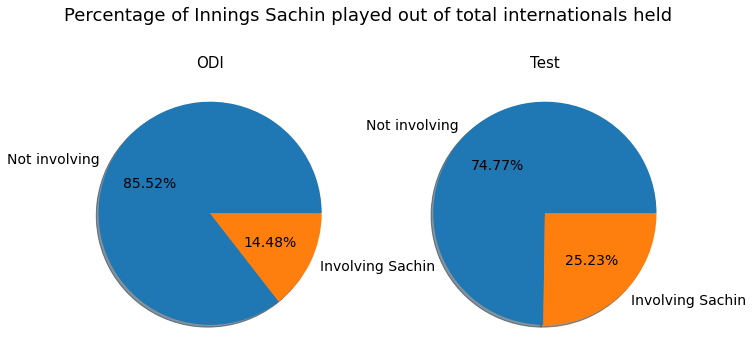

In [36]:
#total number of ODIs held and Sachin played in two separate lists
total_played = [innO.matchNo.iloc[-1] - innO.matchNo.iloc[0],innT.matchNo.iloc[-1] - innT.matchNo.iloc[0] ]
sachin_played = [len(innO), len(innT)]
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(11,6))
fig.suptitle('Percentage of Innings Sachin played out of total internationals held', fontsize = 18)
ax = [ax1,ax2]
labels = ['Not involving','Involving Sachin']
title = ['ODI','Test']
color = sns.set_palette('crest')
for i in range(2):
    ax[i].pie([total_played[i],sachin_played[i]],shadow = True, autopct = '%1.2f%%', colors = color, labels = labels, textprops={'fontsize': 14,'color' : 'black'} )
    ax[i].set_title(f'{title[i]}', fontsize = 15)

It can be implied that Sachin played every 7th ODI and every 4th Test innings that was played during his career. Though he had played more ODI innings than test innings, overall he was most actively playing test cricket than ODI.

Plotting a scatter plot of runs scored in each innnings for ODI and Test to visualize the pattern of runs scored in each innings

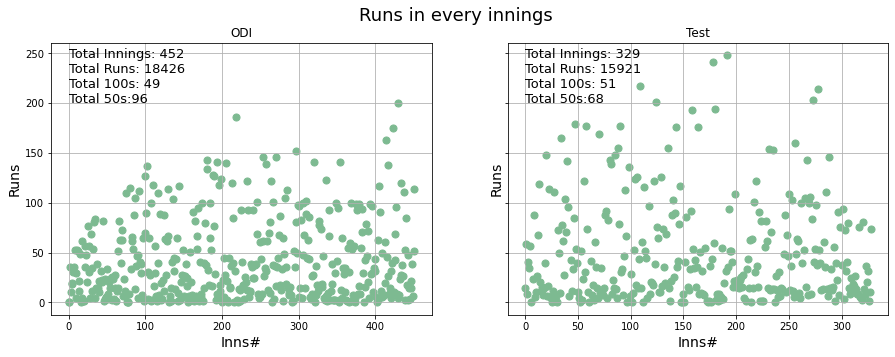

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Runs in every innings', fontsize = 18)
color = sns.set_palette('crest')
df = [innO,innT]
title = ['ODI','Test']
ax = (ax1,ax2)
for i in range(2):
    ax[i].scatter(df[i].index, df[i].runs,s = 50, color = color)
    ax[i].set_xlabel('Inns#', fontsize = 14)
    ax[i].set_ylabel('Runs', fontsize = 14)
    ax[i].set_title(f'{title[i]}')
    ax[i].grid()
    ax[i].text(0,200,f'Total Innings: {df[i].count()[0]}\nTotal Runs: {df[i].runs.sum()}\nTotal 100s: {df[i][df[i].runs >= 100].count()[0]}\nTotal 50s:{df[i][(df[i].runs >= 50)&(df[i].runs < 100)].count()[0]}', color = color, fontsize = 13)

Runs in ODIs closely distributed under 50 where it is comparatively sparse in Tests. Sachin crossed 100 in ODI only after more than 50 number of innings whereas he scored 100 in test very early in this career. The first score above 150 came after 200 innings in ODIs whereas he scored above 150 in tests early in the career. He scored 200 in tests after more than 100 innings which took more than 400 innings in ODI though it is considered a very rare feat in ODIs. 

To visualize the distribution of range of runs, plotting a violin plot

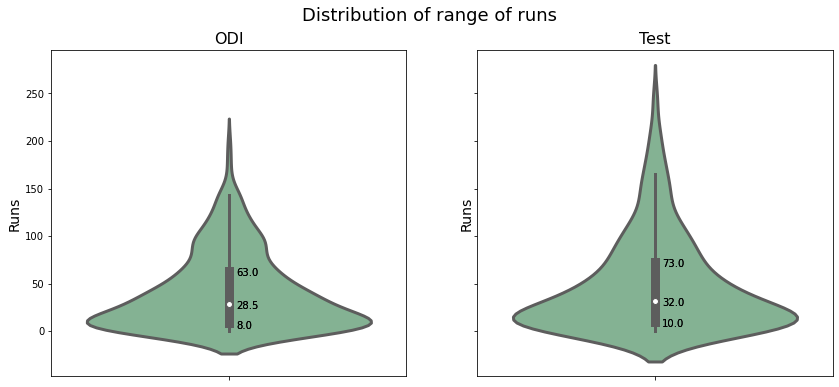

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,6), sharey = True)
fig.suptitle('Distribution of range of runs', fontsize = 18)
ax = [ax1,ax2]
df = [innO, innT]
title = ['ODI','Test']
for i in range(2):
    sns.violinplot(y = df[i].runs, ax = ax[i], color = sns.set_palette('crest'), linewidth = 3)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].set_ylabel('Runs', fontsize = 14)
    for i in range(2):
        quan = [df[i].runs.quantile(q=0.25),df[i].runs.quantile(q=0.5),df[i].runs.quantile(q=0.75)]
        for j in range(3):
            ax[i].text(0.02,quan[j]-5,f'{round(quan[j],1)}')

Scores have a longer distribution upto 250 in tests while it is 200 in odis. In both tests and odis, major distribution of scores are between 0 and 30. There is more density of runs between 0 and 30 in odis than tests. There is not much difference in the interquartile range. Just above the interquartile range, there is a little spike in the distribution upto 110 runs in odis while it is a gradual distribution in Tests. We can imply that Sachin missed out many hundreds in odis than tests. Though this violin plot gives good idea about run distribution, we cannot conclude anything quantitively from this. So plotting a pie chart to visualize the run distribution quantitively. 

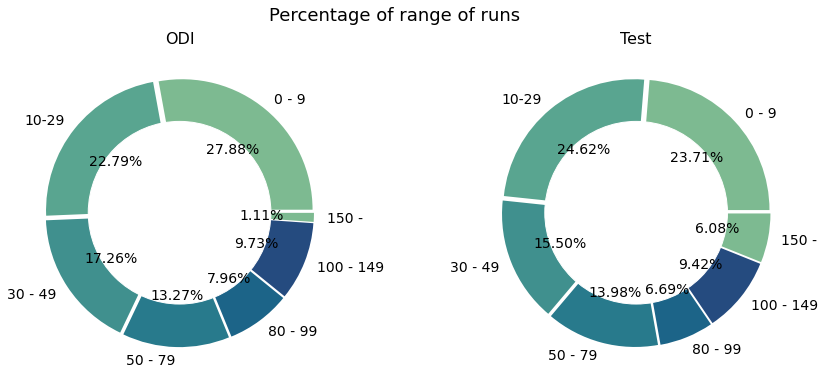

In [39]:
def runs_range(df):  
    single_digit = len(df[df.runs.between(0,9)])/len(df)
    twenties = len(df[df.runs.between(10,29)])/len(df)
    thirties = len(df[df.runs.between(30,49)])/len(df)
    fifites = len(df[df.runs.between(50,79)])/len(df)
    eighties = len(df[df.runs.between(80,99)])/len(df)
    hundreds = len(df[df.runs.between(100,149)])/len(df)
    highs = len(df[df.runs.between(150,299)])/len(df)
    dict = {
      'Runs' : ['0 - 9', '10-29', '30 - 49', '50 - 79', '80 - 99', '100 - 149', '150 -'],
      'Inns' : [single_digit, twenties, thirties, fifites, eighties, hundreds, highs]
      }
    return pd.DataFrame(dict)
range1 = runs_range(innO)
range2 = runs_range(innT)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
fig.suptitle('Percentage of range of runs', fontsize = 18)
ax = [ax1,ax2]
colors = sns.set_palette('crest')
df = [range1,range2]
title = ['ODI', 'Test']
for i in range(2):
    ax[i].pie(df[i].Inns, labels = df[i].Runs, autopct = '%1.2F%%', colors=colors, explode = [0.03]*7, textprops = {'fontsize' : 14})
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].add_artist(plt.Circle((0,0),0.7,color = 'white'))

In ODIs, scores are largerly between 0 and 9 whereas it is between 10 and 29 in tests. There are more number of runs between 30 and 49 in odis than tests. Almost equal number of runs between 50 and 79 in both odis and tests. Between 80 and 99, there are more number of runs in odis than tests which imply that Sachin missed out scoring more hundreds in odis than tests. Almost equal number of runs between 100 and 149 in both ODIs and tests while above 150 there is a high number of runs in tests than odis.

Plotting a bar chart to visualize conversion rate of 50s and 100s

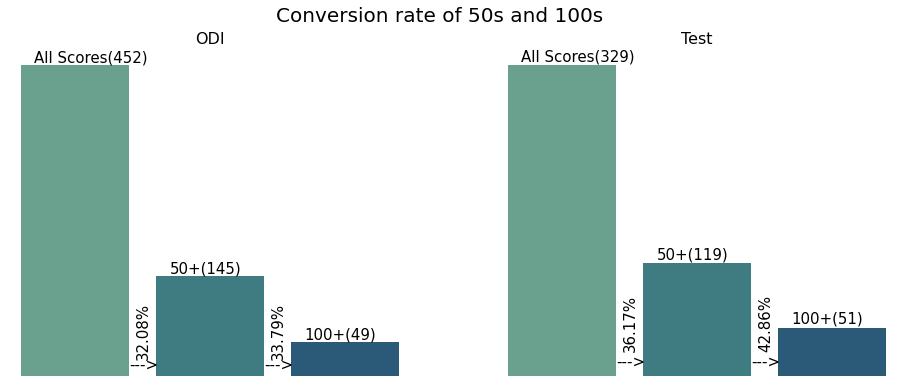

In [40]:
def conversion(df):
    inns = len(df)
    fifplus = len(df[df.runs.between(50,250)])
    hundreds = len(df[df.runs.between(100,250)])
    list_ = [inns,fifplus,hundreds]
    return list_
conversion1 = conversion(innO)
conversion2 = conversion(innT)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
fig.suptitle('Conversion rate of 50s and 100s', fontsize=20)
ax = [ax1,ax2]
title = ['ODI','Test']
conver = [conversion1,conversion2]
for i in range(2):
    sns.barplot(['inns','50+','100+'], conver[i], ax= ax[i], palette='crest')
    labels = ['All Scores','50+','100+']
    for j in range(3):
        ax[i].text(j-0.3,conver[i][j]+5 , f'{labels[j]}({conver[i][j]})', fontsize=15)
    for k in range(2):
        ax[i].text(k+0.4,10 , '--->', fontsize=15)
    for l in range(2):
        ax[i].text(l+0.45,29 , f'{round(conver[i][l+1]*100/(conver[i][l]),2 )}%', fontsize=15, rotation = 90)
    ax[i].axis('off')
    ax[i].set_title(f'{title[i]}',fontsize=16)

Out of all scores, 32.08% of the scores are 50+ in odis while it is 36.17% in tests. out of all 50+ scores, 33.79% of the scores are 100+ in odis and 42.86% in tests. It can be implied that Sachin scored 50+ and 100+ scores more often in tests than odis. Every 3.1th score was 50+ and every 2.9th 50 + score was 100+ in odis. Every 2.7th score was 50+ and every 2.3th 50 + score was 100+ in tests.

Plotting a pie chart to visualize the percent of runs scored through boundaries

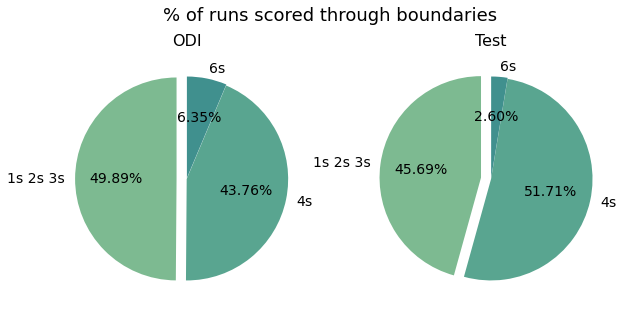

In [41]:
total_runs = [innO.runs.sum(), innT.runs.sum()]
sixes = [innO['6s'].sum()*6, innT['6s'].sum()*6]
fours = [innO['4s'].sum()*4, innT['4s'].sum()*4]
runs = []
for i in range(2):
    run = total_runs[i]-sixes[i]-fours[i]
    runs.append(run)
x = [runs,fours,sixes]
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('% of runs scored through boundaries',fontsize = 18)
ax = [ax1,ax2]
title = ['ODI', 'Test']
for i in range(2):
    ax[i].pie([runs[i],fours[i],sixes[i]], labels = ['1s 2s 3s','4s','6s'],startangle=90, explode = (0.1,0.0,0.01),autopct='%1.2f%%', colors= sns.set_palette('crest'), textprops={'fontsize':14})
    ax[i].set_title(f'{title[i]}', fontsize = 16)

50.11% of runs were scored through boundaries in odis while 54.31% of runs were scored through boundaries in tests. 1s, 2s and 3s were the majority of runs in odis while 4s was the majority of runs in tests. Not suprisingly, more proportion of runs were 6s in odis than tests. 

Plotting a violin plot to visualize the distribution of strike rate in odis and tests

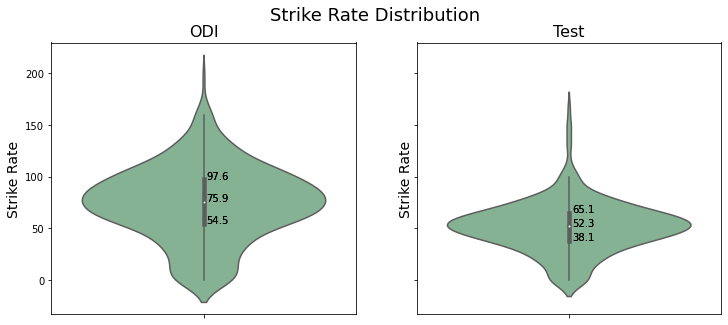

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,5), sharey=True)
fig.suptitle('Strike Rate Distribution', fontsize = 18)
ax = [ax1,ax2]
df = [innO, innT]
title = ['ODI','Test']
for i in range(2):
    sns.violinplot(y = df[i].srate, ax = ax[i])
    for i in range(2):
        quan = [df[i].srate.quantile(q=0.25),df[i].srate.quantile(q=0.5),df[i].srate.quantile(q=0.75)]
        for j in range(3):
            ax[i].text(0.01,quan[j],f'{round(quan[j],1)}')
        ax[i].set_title(f'{title[i]}', fontsize = 16)
        ax[i].set_ylabel('Strike Rate', fontsize =14)

Majority of strike rates are distributied in the range of 70 and 80 in odis while it is in the range of 45 and 55 in tests. Plotting the scatter plots of strike rate against runs to understand the relation ship between runs and strike rate

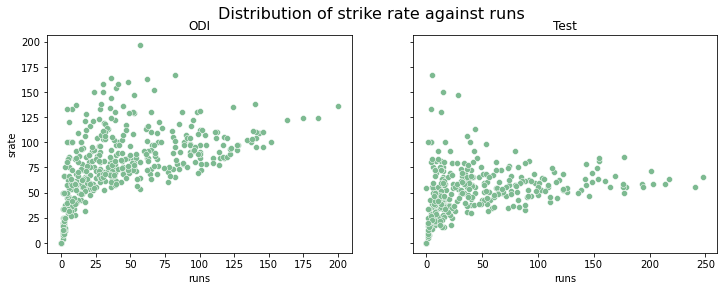

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,4), sharey = True)
fig.suptitle('Distribution of strike rate against runs', fontsize = 16)
ax = (ax1,ax2)
df = (innO,innT)
title = ('ODI','Test')
for i in range(2):
    sns.scatterplot(df[i].runs, df[i].srate, ax=ax[i], color = sns.set_palette('crest'))
    ax[i].set_title(f'{title[i]}')

Though there is no clear relationship between runs and strike rates, the general trend in odis is higher the runs higher the strike rate. Whenever Sachin scored more than 50 runs, he scored at more than 50 strike rate. In tests, the strike rates are mostly distributed in the majority range with some outliers. Whenever Sachin scored more than 100 runs, strike rates is less than 100 in tests. 

To capture performance at difference positions that Sachin batted, plotting a pie chart representing the percentage of times he batted in the particular position and a bar chart representing average in these positions.

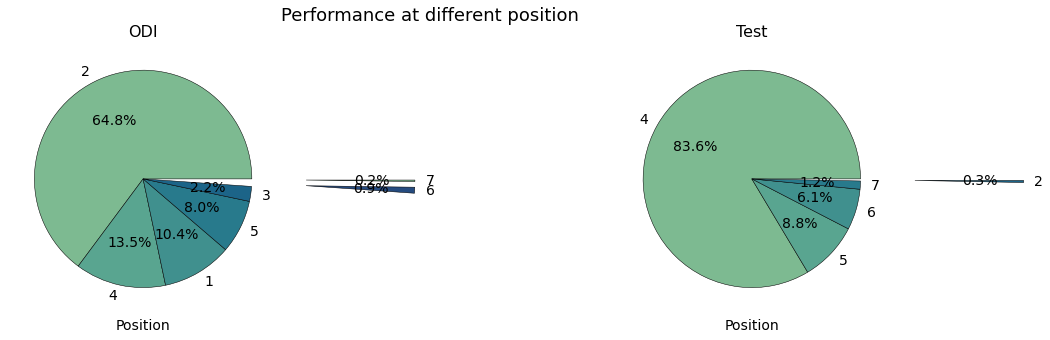

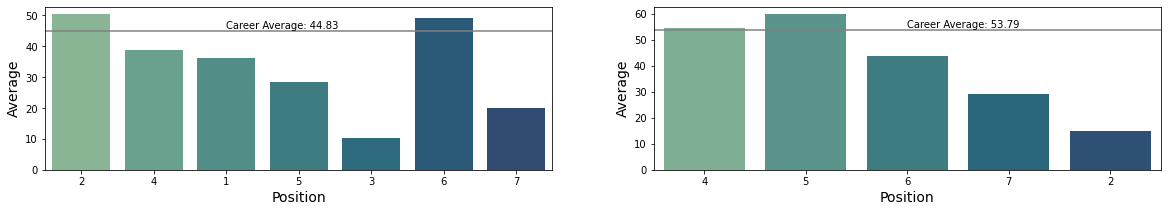

In [44]:
def position(df):
    matches = df.position.value_counts().reset_index()
    pos = df.groupby('position')['position','runs','notout'].sum().reset_index()
    matches.columns = ['position','matches']
    df1 = matches.merge(pos)
    df1['average'] = round(df1['runs'] / (df1['matches'] - df1['notout']),2)
    return df1
posO = position(innO)
posT = position(innT)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Performance at different position', fontsize = 18)
df = [posO,posT]
ax = [ax1,ax2]
wdgprs = {'linewidth':0.5, 'edgecolor': 'black'}
txtprs = {'fontsize':14, 'color': 'black'}
explode = [(0.0,0.0,0.0,0.0,0.0,1.5,1.5),(0.0,0.0,0.0,0.0,1.5)]
title = ['ODI','Test']
for i in range(2):
    ax[i].pie(df[i].matches, autopct = '%1.1f%%', colors = sns.set_palette('crest'),wedgeprops = wdgprs, textprops = txtprs, labels = df[i].position, explode = explode[i])
    ax[i].set_xlabel('Position', fontsize = 14)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,3))
ax = (ax1,ax2)
average = [innO.runs.sum()/(len(innO)-innO.notout.sum()),innT.runs.sum()/(len(innT)-innT.notout.sum())]
for i in range(2):
    sns.barplot(df[i].position, df[i].average, ax = ax[i], palette = 'crest')
    ax[i].set_ylabel('Average', fontsize = 14)
    ax[i].set_xlabel('Position', fontsize = 14)
    ax[i].axhline(average[i], color = 'grey')
    ax[i].text(2,average[i]+1,f'Career Average: {round(average[i],2)}')

In odis, Sachin mostly batted at No. 2. No. 4, 1 and 5 are other positions in which he batted considerably. But he performed exceptionally only at No. 2 where he averaged nearly 50. At other positions, he averaged below 40.

In tests, Sachin mostly batted at No. 4. No. 5 and No. 6 were other considerable positions. It can be noted that he averaged nearly 60 when he played at No.5 while the average at No. 4 is nearly 54. Average at No 6 though comparatively low is more than 40.

To capture performance at difference innings that Sachin batted, plotting a pie chart representing the percentage of times he batted in the particular innings and a bar chart representing average in these innings.

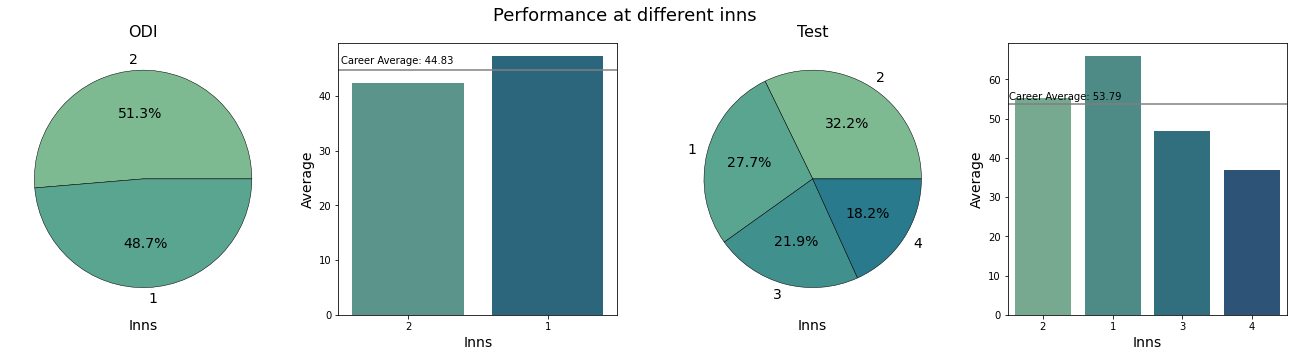

In [45]:
def inn(df):
    matches = df.inns.value_counts().reset_index()
    inn = df.groupby('inns')['inns','runs','notout'].sum().reset_index()
    matches.columns = ['inns','matches']
    df1 = matches.merge(inn)
    df1['average'] = round(df1['runs'] / (df1['matches'] - df1['notout']),2)
    return df1
inO, inT = inn(innO),inn(innT)
df = [inO,inT]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (23,5))
fig.suptitle('Performance at different inns', fontsize = 18)
df = [inO,inT]
ax = [ax1,ax3]
wdgprs = {'linewidth':0.5, 'edgecolor': 'black'}
txtprs = {'fontsize':14, 'color': 'black'}
title = ['ODI','Test']
for i in range(2):
    ax[i].pie(df[i].matches, autopct = '%1.1f%%', colors = sns.set_palette('crest'),wedgeprops = wdgprs, textprops = txtprs, labels = df[i].inns)
    ax[i].set_xlabel('Inns', fontsize = 14)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
ax = (ax2,ax4)
average = [innO.runs.sum()/(len(innO)-innO.notout.sum()),innT.runs.sum()/(len(innT)-innT.notout.sum())]
for i in range(2):
    sns.barplot(df[i].inns, df[i].average, ax = ax[i], palette = 'crest')
    ax[i].set_ylabel('Average', fontsize = 14)
    ax[i].set_xlabel('Inns', fontsize = 14)
    ax[i].axhline(average[i], color = 'grey')
    ax[i].text(-0.48,average[i]+1,f'Career Average: {round(average[i],2)}')

In ODIs,Sachin batted chasing most of the times than batting first but the difference is negligible. He comparatively batted well while batting first than chasing as he averaged more than 45 while batting first and nearly 42 while chasing. But both are good averages for ODIs

In tests, Sachin batted mostly(60% of the times) in 1st innings (1 & 2) and also in 1st innings Sachin batted exceptionally well averging over 54 and 60 above while batting first and second respectively. While bating 1st in 2nd innings, Sachin has a decent average of around 45. He averaged comparatively poor while chashing in test matches with average around 35. 

Plotting a pie chart and swarmplot to see the dismissal trends in ODIs and tests.

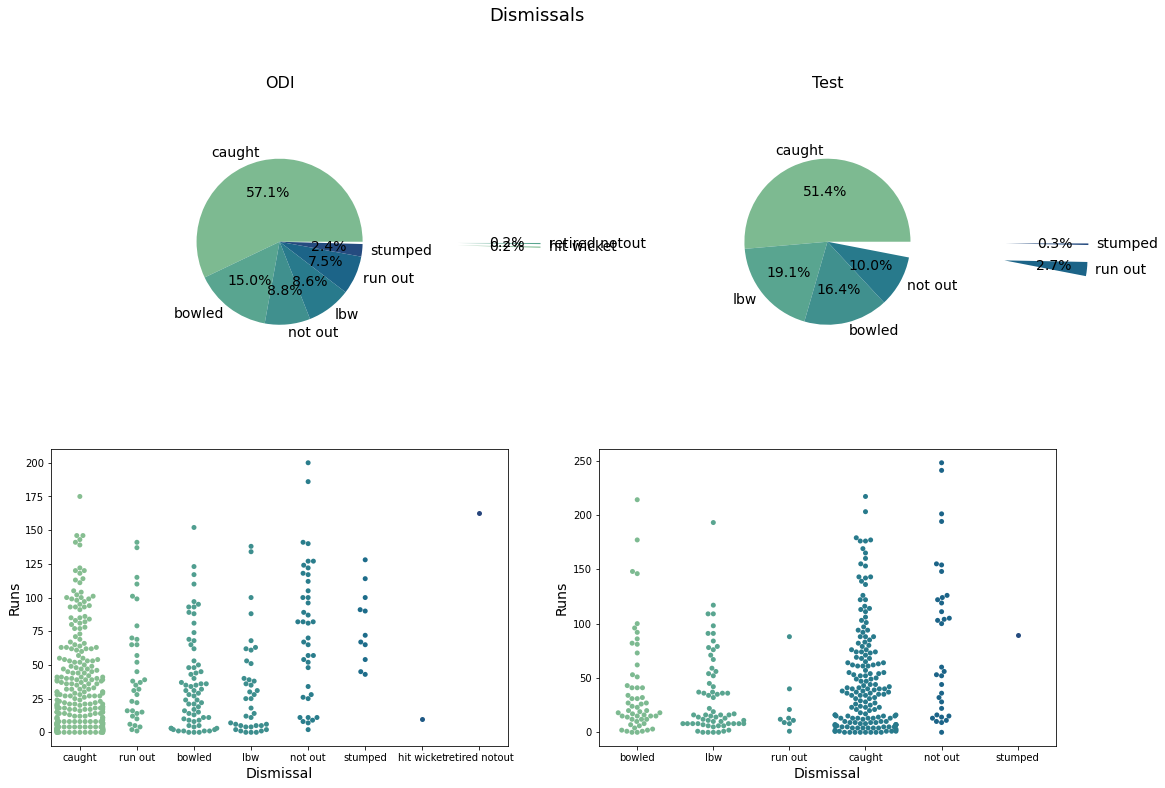

In [46]:
def dis(df):
    ds = df.dismissal.value_counts().reset_index()
    ds.columns = ['Dismissal', 'Frequency']
    return ds
d1 = dis(innO)
d2 = dis(innT)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (18,12))
fig.suptitle('Dismissals', fontsize = 18)
ax = (ax1,ax2)
df = (d1,d2)
color = sns.set_palette('crest')
title = ('ODI','Test')
explode = [(0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.5),(0.0,0.0,0.0,0.0,1.5,1.5)]
for i in range(2):
    ax[i].pie(df[i].Frequency, labels = df[i].Dismissal,autopct='%1.1f%%', colors = color, textprops = {'fontsize' : 14}, explode = explode[i], radius = .7)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
ax = (ax3,ax4)
df = [innO,innT]
for i in range(2):
    sns.swarmplot(x = df[i].dismissal, y = df[i].runs, ax = ax[i], palette = 'crest')
    ax[i].set_xlabel('Dismissal', fontsize = 14)
    ax[i].set_ylabel('Runs', fontsize = 14)

Both in ODIs and tests, he got out mostly by caught. Followed by it, bowled in ODIs and LBW in tests. He got hit wicket and retired out in ODIs once. This form of dismissals had not happended in tests. He got out by stumped only once in tests. In odis, stumped form of dismissal had happended only after he scored nearly 50 runs. Though bowled and lbw are major forms of dismissals, they seldom happened if Sachin crossed 100 in both odis and tests. 

**Performance Against Different Teams**

To visualize performance against different teams, in addition to the available data, creating aggregate table by group by opposition column. This will give us aggregate values of relevant columns with respect to opposition coloumn.

In [47]:
def opposition(df):
    matches = df.opposition.value_counts().reset_index()
    runs = df.groupby('opposition')['opposition','runs','balls','6s','4s','notout'].sum().reset_index()
    matches.columns = ['opposition','matches']
    df1 = matches.merge(runs)
    df1['avg'] = round(df1['runs'] / (df1['matches']-df1['notout']),2)
    df1['srate'] = round(df1['runs']*100/df1['balls'],2)
    df1['bPinns'] = round((df1['6s']+df1['4s'])/df1.matches)
    hund = []
    fift = []
    for team in df1.opposition:
        fif = df[(df['opposition'] == team) & (df['runs'].between(50,99))].count()[0]
        fift.append(fif)
        hun = df[(df['opposition'] == team) & (df['runs'] >= 100)].count()[0]
        hund.append(hun)
    df1['100s'] = hund
    df1['50s'] = fift
    df1 = df1.iloc[range(8)]
    return df1
p1 = opposition(innO)
p2 = opposition(innT)
p1

opposition  matches  runs  balls  6s   4s  notout    avg  srate  bPinns  \
0     Sri Lanka       80  3113   3556  30  303       9  43.85  87.54     4.0   
1     Australia       70  3077   3632  35  330       1  44.59  84.72     5.0   
2      Pakistan       67  2526   2887  29  294       4  40.10  87.50     5.0   
3  South Africa       57  2001   2622  15  219       1  35.73  76.32     4.0   
4   New Zealand       41  1750   1835  26  206       3  46.05  95.37     6.0   
5   West Indies       39  1573   2016   8  152       9  52.43  78.03     4.0   
6       England       37  1455   1631  17  173       4  44.09  89.21     5.0   
7      Zimbabwe       33  1377   1504  20  152       5  49.18  91.56     5.0   

   100s  50s  
0     8   17  
1     9   15  
2     5   16  
3     5    8  
4     5    8  
5     4   11  
6     2   10  
7     5    5

In [48]:
p2

opposition  matches  runs  balls  6s   4s  notout    avg  srate  bPinns  \
0     Australia       74  3630   6110  25  434       8  55.00  59.41     6.0   
1       England       53  2535   4855   8  357       4  51.73  52.21     7.0   
2  South Africa       45  1741   3648   9  242       4  42.46  47.72     6.0   
3   New Zealand       39  1595   2997   6  212       5  46.91  53.22     6.0   
4     Sri Lanka       36  1995   3694  10  241       3  60.45  54.01     7.0   
5   West Indies       32  1630   3148   5  218       2  54.33  51.78     7.0   
6      Pakistan       27  1057   2114   0  141       2  42.28  50.00     5.0   
7      Zimbabwe       14   918   1597   2  126       2  76.50  57.48     9.0   

   100s  50s  
0    11   16  
1     7   13  
2     7    5  
3     4    8  
4     9    6  
5     3   10  
6     2    7  
7     3    3

Plotting bar charts of important aspects against different teams to visulize the performance against different teams at one place. Performance against only top 8 teams that he played with is taken into consideration as taking account for other teams would have more outliers since the number of matches played was less and also the teams were comparatively weaker.

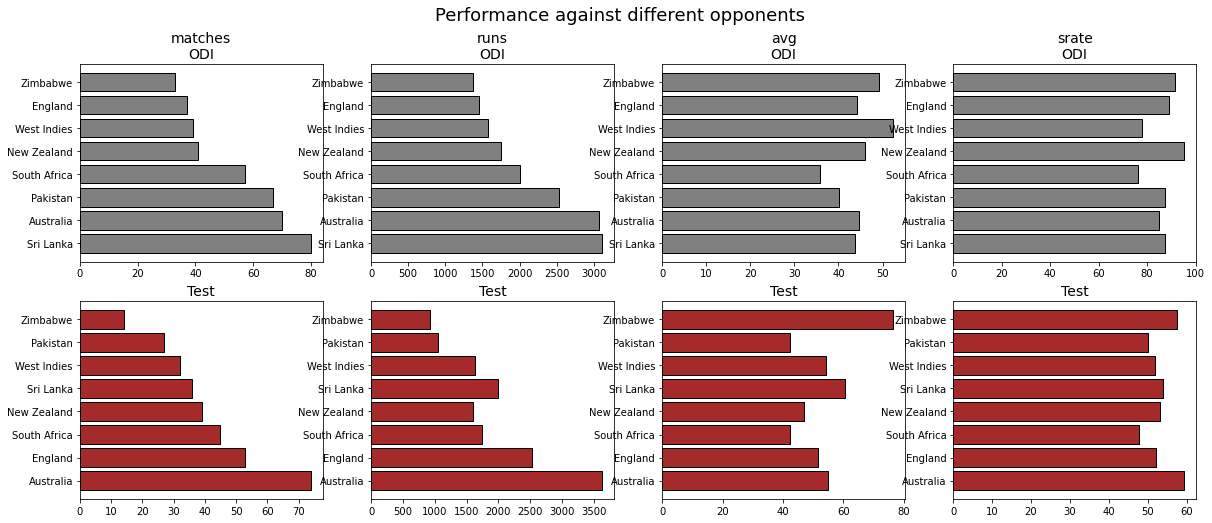

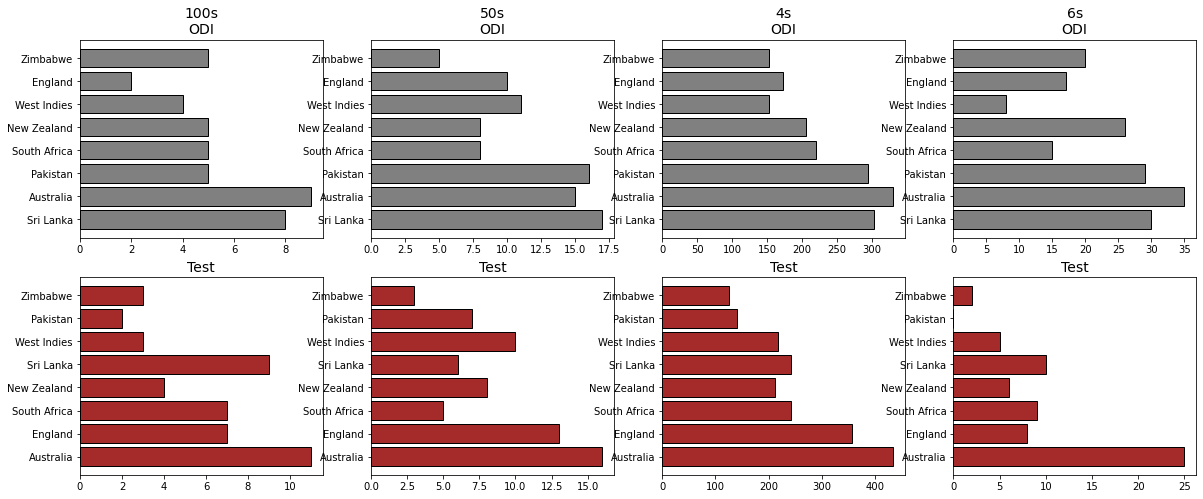

In [51]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(20,8))
fig.suptitle('Performance against different opponents', fontsize = 18)
ax = (ax1,ax2,ax3,ax4)
cols = ['matches','runs','avg','srate','100s','50s','4s','6s']
df = [p1,p2]
for i in range(4):
    ax[i].barh(df[0].opposition,df[0][cols[i]], edgecolor = 'black', color = 'grey')
    ax[i].set_title(f'{cols[i]}\nODI',fontsize = 14)
ax = (ax5,ax6,ax7,ax8)
for i in range(4):
    ax[i].barh(df[1].opposition,df[1][cols[i]], edgecolor = 'black', color = 'brown')
    ax[i].set_title('Test', fontsize = 14)
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(20,8))
ax = (ax1,ax2,ax3,ax4)
cols = ['100s','50s','4s','6s']
for i in range(4):
    ax[i].barh(df[0].opposition,df[0][cols[i]], edgecolor = 'black', color = 'grey')
    ax[i].set_title(f'{cols[i]}\nODI',fontsize = 14)
ax = (ax5,ax6,ax7,ax8)
for i in range(4):
    ax[i].barh(df[1].opposition,df[1][cols[i]], edgecolor = 'black', color = 'brown')
    ax[i].set_title('Test', fontsize = 14)

In ODIs, Sachin played most matches against Sri Lanka and hit most runs against Sri Lanka. He had best average against West Indies and best strike rate against New Zealand. He scored most 100s against Australia and 50s against Sri Lanka.He hit most 6s and 4s against Australia.

In tests, Sachin played most matches against Australia and hit most runs against Australia. He had best average against Zimbabwe and best strike rate against Australia. He scored most 100s against Australia and 50s against Australia.He hit most 6s and 4s against Australia.

It is interesting to note that Sachin had not hit 6 against Pakistan in tests. Though the above plot gives the overall picture, plotting the individual aspects and comparing the career stat will spell out how his performances against different teams varied. 

Plotting a interactive bar plot to visualize the batting performance against different teams. Average is taken as the main parameter as it indicates how he performanced overall against the particular team.

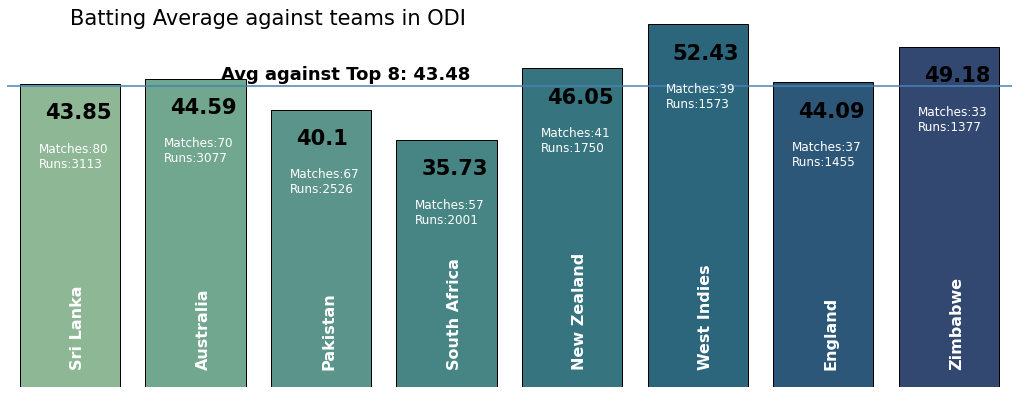

None


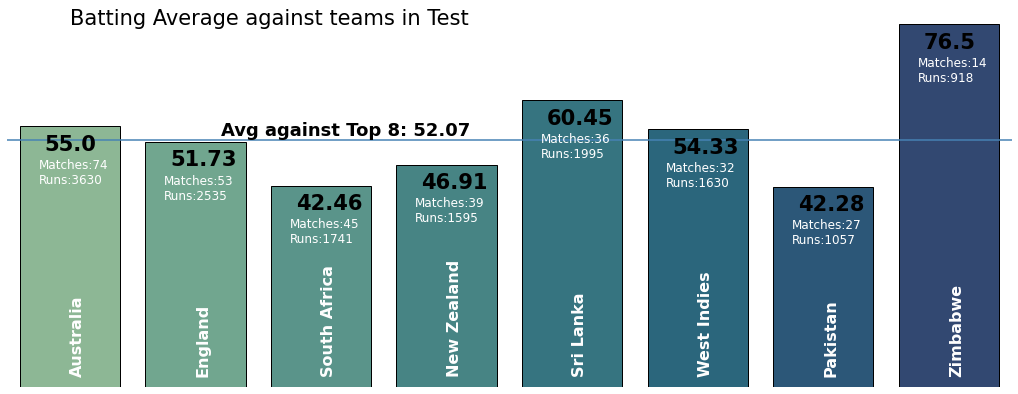

None


In [52]:
def batting_avg(df,player,format):
    plt.figure(figsize=(18,7))
    sns.barplot(df.opposition, df.avg, palette='crest', edgecolor = 'black')
    avg = round(df.runs.sum()/(df.matches.sum()-df.notout.sum()),2)
    plt.axhline(avg, color = 'steelblue')
    for a,b in zip(range(len(df)), df.opposition):
        plt.text(a,3,b, rotation = 90, fontsize = 16, color = 'w', weight = 'bold')
    for a,b in zip(range(len(df)), df.avg):
        plt.text(a-0.2,b-5,b, fontsize = 21, color = 'black', weight = 'bold')
    x = 0
    y = df.avg.tolist()
    for a,b in zip(df.matches, df.runs):
        plt.text(x-0.25,y[x]-12 ,f'Matches:{a}\nRuns:{b}', fontsize = 12, color = 'white')
        x+=1
    plt.text(1.2, avg+1, f'Avg against Top 8: {avg}', color = 'black', weight = 'bold', fontsize = 18)
    plt.text(0, max(df.avg), f'Batting Average against teams in {format}', fontsize = 21)
    plt.axis('off')
    plt.show()
print(batting_avg(p1,'Sachin Tendulkar', 'ODI'))
print(batting_avg(p2,'Sachin Tendulkar', 'Test'))

The bar plots indicate the average of sachin against different teams in ODIs and Tests. Career average against top 8 is used to compare the individual averages. 

Sachin's test career average is 53.8 while the average against the top eight teams is 52.07. There is not much difference. Sachin averaged above 40 in tests against all the teams. His average was the least against South Africa, then Pakistan. Against other teams, he averaged on par with average against Top 8 against other teams. He averaged 76.5 against Zimbabwe and 60.45 against Sri Lanka. He performed the least against South Africa, Pakistan and the best against Zimbabwe and Sri Lanka. 

Sachin's odi career average is 44.83 while the average against the top eight teams is 43.48. There is not much difference here as well. Sachin averaged 35.73 the least aginst South Africa. Averages against other teams are over 40 and near overall average. He averaged 52.43 against West Indies and 49.18 against Zimbabwe. His performances against Australia, New Zealand were quiet good too. He performed the best against West Indies and the least against South Africa. 

Plotting a swarmplot to understand the distribution of runs against different teams. All teams are considered for this plot not just 8 teams

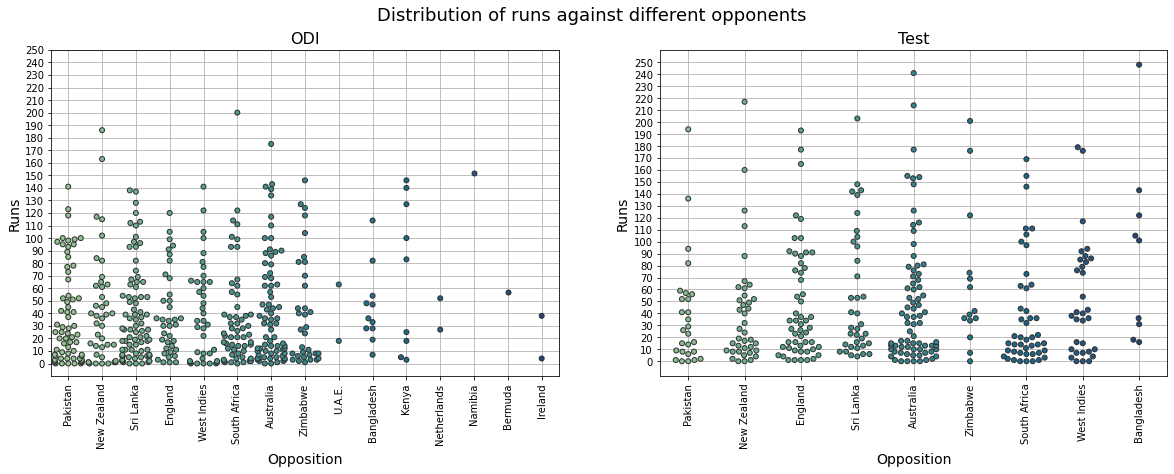

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))
fig.suptitle('Distribution of runs against different opponents', fontsize = 18)
ax = (ax1,ax2)
df = (innO,innT)
title = ['ODI','Test']
for i in range(2):
    sns.swarmplot(df[i].opposition, df[i].runs, ax = ax[i], palette = 'crest', linewidth = 1)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].set_xlabel('Opposition', fontsize = 14)
    ax[i].set_ylabel('Runs', fontsize = 14)
    ax[i].tick_params(axis = 'x', labelrotation = 90)
    ax[i].set_yticks(range(0,260,10))
    ax[i].grid()

In odis, Sachin had not scored century against UAE, Netherlands, Bermuda and Ireland but he did not play more than 2 matches against them. He scored century against all major teams.He scored 150 plus scores against Australia, South Africa, New Zealand(twice) and Namibia. In tests, Sachin scored 100 against all teams and also atleast one 150 score against all teams. He scored 200 above twice against Australia and one each against New Zealand, Sri Lanka, Bangladesh and Zimbabwe. 

It is interesting to note that Sachin has a good number of scored between 90 and 100 against Pakistan, Sri Lanka and England in ODIs. This represents the missed out opportunitis to score 100s. This is not majorly seen in tests. To understand how often Sachin made into 100s from 50s, we can do some manipulation and visualize. Plotting a bar chart for this purpose.

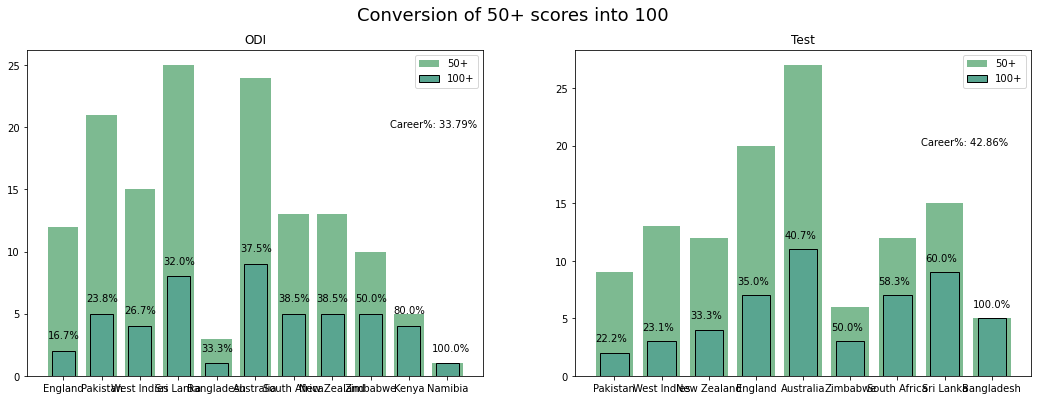

In [56]:
def fif2hun(df):
    fifabv = df[df.runs >= 50]['opposition'].value_counts().reset_index()
    hunabv = df[df.runs >=100]['opposition'].value_counts().reset_index()
    crossingFifties = fifabv.merge(hunabv, on = 'index')
    crossingFifties.columns = ['Team','50+','100+']
    crossingFifties['%'] = crossingFifties['100+']*100/crossingFifties['50+']
    return crossingFifties.sort_values(by = '%')
fif2hunO = fif2hun(innO)
fif2hunT= fif2hun(innT)
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,6))
ax = (ax1,ax2)
df = [fif2hunO, fif2hunT]
title = ['ODI', 'Test']
fig.suptitle('Conversion of 50+ scores into 100', fontsize = 18)
for i in range(2):
    ax[i].bar(df[i].Team, df[i]['50+'], label = '50+')
    ax[i].bar(df[i].Team, df[i]['100+'], label = '100+', width = 0.6, edgecolor ='black')
    ax[i].legend()
    for a in range(len(df[i])):
        ax[i].text(a-0.4,df[i]['100+'].iloc[a]+1,f"{round(df[i]['%'].iloc[a], 1)}%")
    ax[i].set_title(f'{title[i]}')
ax1.text(8.5,20,f'Career%: {round(len(innO[innO.runs>=100])*100/len(innO[innO.runs>=50]),2)}%')
ax2.text(6.5,20,f'Career%: {round(len(innT[innT.runs>=100])*100/len(innT[innT.runs>=50]),2)}%')
plt.show()

In ODIs, coversion rate of 50+ scores into 100 were the least against England with just 16.7%. Also against Pakistan, West Indies, Bangladesh and Sri Lanka, the conversion rate were lower than the career rate of 33.79%. Conversion rates were good against relatively weaker teams. 

In tests, conversion rate of 50+ scores into 100 were the least against Pakistan and West Indies with just 22.2% and 23.1%. Against Australia, New Zealand and England, conversion rate is below the career conversion rate.

Plotting a count plot to understand the dismissal patterns against different teams

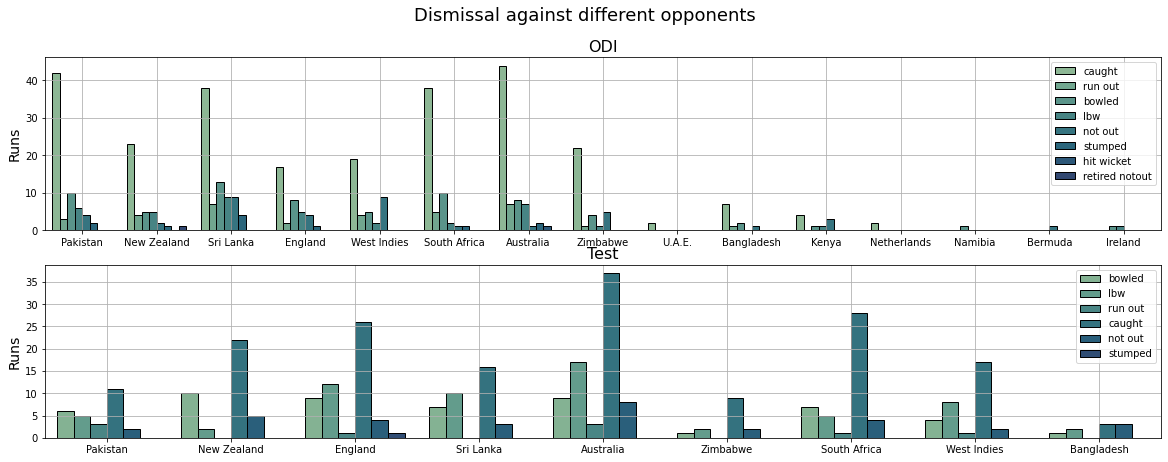

In [57]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,7))
fig.suptitle('Dismissal against different opponents', fontsize = 18)
ax = (ax1,ax2)
df = (innO,innT)
title = ['ODI','Test']
for i in range(2):
    sns.countplot(df[i].opposition, hue = df[i].dismissal, ax = ax[i], palette = 'crest', edgecolor = 'black')
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Runs', fontsize = 14)
    ax[i].grid()
    ax[i].legend(loc= 'upper right')

In ODIs, caught out is the major form of dismissal against all teams against which he played a considerable number of matches. The same applies for test as well. We could not conclude how often a particular dismissal occured against particular team from this as the team against which the more matches played tend to dominate in this. To have a clear picture, pie chat will be helpfull.

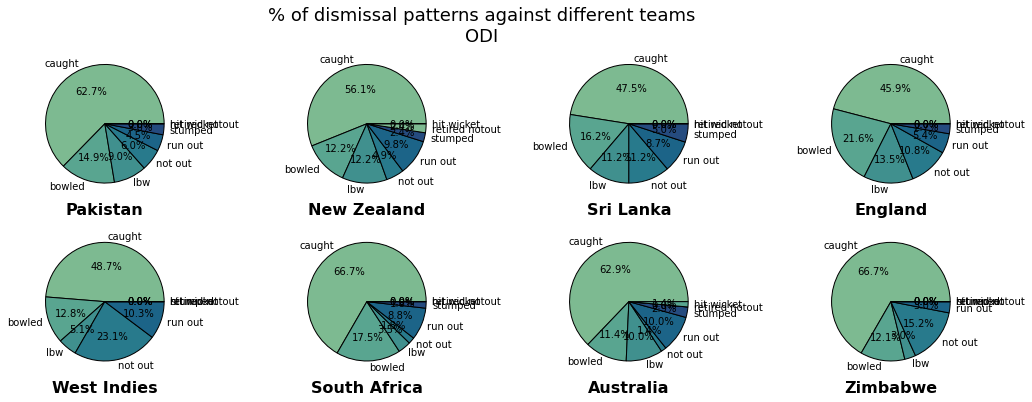

In [58]:
countries = [country for country in innO.opposition.unique()]
dismissals = []
for country in countries:
     dismissals.append(innO[innO['opposition'] == country]['dismissal'].value_counts().reset_index())
for i in range(len(dismissals)-1):
    if i == 0:
        final = dismissals[i].merge(dismissals[i+1], on = 'index', how= 'outer').fillna(0)
    else:
        final = final.merge(dismissals[i+1], on = 'index', how= 'outer').fillna(0)
final.set_index('index', inplace = True)
final.columns = countries
final.drop(final.iloc[:,8:], axis = 1, inplace = True)
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize = (18,6))
ax = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)
fig.suptitle('% of dismissal patterns against different teams\nODI', fontsize = 18)
for i in range(8):
    ax[i].pie(final.iloc[:,i], wedgeprops = {'linewidth':1, 'edgecolor':'black'},
             labels = final.index, autopct = '%1.1f%%')
    ax[i].set_xlabel(final.columns[i], weight = 'bold', fontsize = 16)

In ODIs, though dismissal by caught is the major form of dismissal, we can see that it is of varying percentage against different teams. Against Austrlia, Zimbabwe, South Africa and Pakistan, it consistute for more than 60% of the dismissals. Against England, Sachin was dismissed bowled 21.6% the highest for the dismissal by bowled. It is interesting to that that Sachin remained not out 23.1% of the dismissals against West Indies. The second in this catagory is zimbabwe with 15.2%. Other forms of dismissals either are not that much varying or too small occurrance. 

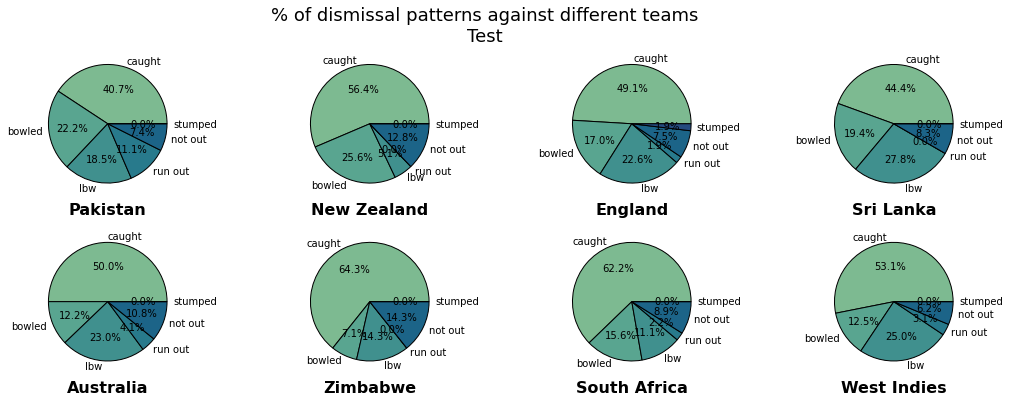

In [59]:
countries = [country for country in innT.opposition.unique()]
dismissals = []
for country in countries:
     dismissals.append(innT[innT['opposition'] == country]['dismissal'].value_counts().reset_index())
for i in range(len(dismissals)-1):
    if i == 0:
        final = dismissals[i].merge(dismissals[i+1], on = 'index', how= 'outer').fillna(0)
    else:
        final = final.merge(dismissals[i+1], on = 'index', how= 'outer').fillna(0)
final.set_index('index', inplace = True)
final.columns = countries
final.drop(final.iloc[:,8:], axis = 1, inplace = True)
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize = (18,6))
ax = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)
fig.suptitle('% of dismissal patterns against different teams\nTest', fontsize = 18)
for i in range(8):
    ax[i].pie(final.iloc[:,i], wedgeprops = {'linewidth':1, 'edgecolor':'black'},
             labels = final.index, autopct = '%1.1f%%')
    ax[i].set_xlabel(final.columns[i], weight = 'bold', fontsize = 16)

In tests also, dismissal by caught is the most form of dismissal against all teams. It is over 60% against Zimbabwe and South Africa. Being out by bowled is most against New Zealand with 25.6% and out by LBW is most against Sri Lanka with 27.8%. 

To understand the boundaries per inns in ODIs and Tests, plotting a bar chart

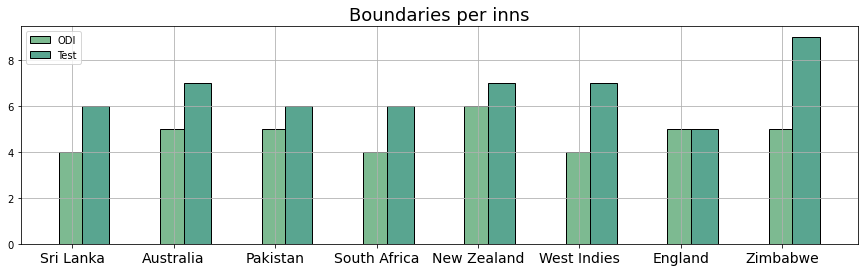

In [60]:
df = [p1,p2]
plt.figure(figsize = (15,4))
plt.title('Boundaries per inns', fontsize = 18)
plt.bar(np.arange(0,23,3),p1['bPinns'],label = 'ODI', edgecolor = 'black')
plt.bar(np.arange(0,23,3)+0.7,p2['bPinns'],label = 'Test', edgecolor = 'black')                                        
plt.legend()
plt.xticks(np.arange(0,23,3),p1.opposition, fontsize = 14)
plt.grid()
plt.show()

In ODIs, Sachin has the most boundaries per innings against New Zealand with 6 boundaries per innings. Against England, Zimbadwe, Pakistan and Australia,5 boundaries per innings and 4 aginst South Africa, West Indies and Sri Lanka. In Tests, Sachin has most number of boundaries(9) per innings against Zimbabwe, 7 against Australia, New Zealand and West Indies. The lowest number of boundaries per innings in tests is 5 against England. 

**Performance over the years**

To visualize performance over the years, in addition to the available data, creating aggregate table by group by year column. This will give us aggregate values of relevant columns with respect to year coloumn.

In [61]:
def year(df):
    innings = df.year.value_counts().reset_index()
    runs = df.groupby('year')['opposition','runs','balls','6s','4s','notout'].sum().reset_index()
    innings.columns = ['year','innings']
    df1 = innings.merge(runs)
    df1['avg'] = round(df1['runs'] / (df1['innings']-df1['notout']),2)
    df1['srate'] = round(df1['runs']*100/df1['balls'],2)
    df1['bPinns'] = round((df1['6s']+df1['4s'])/df1.innings)
    hund = []
    fift = []
    for team in df1.year:
        fif = df[(df['year'] == team) & (df['runs'].between(50,99))].count()[0]
        fift.append(fif)
        hun = df[(df['year'] == team) & (df['runs'] >= 100)].count()[0]
        hund.append(hun)
    df1['100s'] = hund
    df1['50s'] = fift
    return df1.sort_values(by = 'year').reset_index(drop = True)
y1 = year(innO)
y2 = year(innT)
y1

year  innings  runs  balls  6s   4s  notout     avg   srate  bPinns  100s  \
0   1989        1     0      2   0    0       0    0.00    0.00     0.0     0   
1   1990       10   239    242   6   21       0   23.90   98.76     3.0     0   
2   1991       14   417    560   3   33       2   34.75   74.46     3.0     0   
3   1992       20   704   1019   1   50       2   39.11   69.09     3.0     0   
4   1993       17   319    436   3   22       4   24.54   73.17     1.0     0   
5   1994       25  1089   1229  11  130       2   47.35   88.61     6.0     3   
6   1995       12   444    438   4   62       1   40.36  101.37     6.0     1   
7   1996       32  1611   1955  17  163       2   53.70   82.40     6.0     6   
8   1997       36  1011   1190  12  101       3   30.64   84.96     3.0     2   
9   1998       33  1894   1854  40  188       4   65.31  102.16     7.0     9   
10  1999       22   843    951  14   84       2   42.15   88.64     4.0     3   
11  2000       34  1328   1624  13  143       0   39.06   81.77     5.0     3   
12  2001       16   904    990   3  116       3   69.54   91.31     7.0     4   
13  2002       19   741    847   6   78       5   52.93   87.49     4.0     2   
14  2003       21  1141   1306   7  131       1   57.05   87.37     7.0     3   
15  2004       21   812   1014   5  101       1   40.60   80.08     5.0     1   
16  2005       16   412    533   5   51       1   27.47   77.30     4.0     1   
17  2006       16   628    815   7   81       2   44.86   77.06     6.0     2   
18  2007       32  1425   1665  12  192       2   47.50   85.59     6.0     1   
19  2008       12   460    546   0   46       1   41.82   84.25     4.0     1   
20  2009       20   972   1034  13  108       2   54.00   94.00     6.0     3   
21  2010        2   204    152   3   26       1  204.00  134.21    14.0     1   
22  2011       11   513    579   8   54       0   46.64   88.60     6.0     2   
23  2012       10   315    387   2   35       0   31.50   81.40     4.0     1   

    50s  
0     0  
1     1  
2     4  
3     6  
4     1  
5     9  
6     1  
7     9  
8     5  
9     7  
10    1  
11    6  
12    3  
13    3  
14    8  
15    5  
16    2  
17    3  
18   13  
19    3  
20    3  
21    0  
22    2  
23    1

In [62]:
y2

year  innings  runs  balls  6s   4s  notout    avg  srate  bPinns  100s  \
0   1989        6   215    487   0   23       0  35.83  44.15     4.0     0   
1   1990       10   373    783   0   42       1  41.44  47.64     4.0     1   
2   1991        4    78    197   0    9       0  19.50  39.59     2.0     0   
3   1992       11   419    740   0   55       1  41.90  56.62     5.0     3   
4   1993        9   640   1333   3   83       2  91.43  48.01    10.0     2   
5   1994       11   700   1179   2  100       1  70.00  59.37     9.0     2   
6   1995        4    58    100   0    6       2  29.00  58.00     2.0     0   
7   1996       15   623   1277   3   89       0  41.53  48.79     6.0     2   
8   1997       17  1000   1969   5  131       1  62.50  50.79     8.0     4   
9   1998        9   647    858  11   83       1  80.88  75.41    10.0     3   
10  1999       19  1088   1928   3  134       3  68.00  56.43     7.0     5   
11  2000       10   575    954   2   83       1  63.89  60.27     8.0     2   
12  2001       18  1003   1755   5  144       2  62.69  57.15     8.0     3   
13  2002       26  1392   2568   4  197       1  55.68  54.21     8.0     4   
14  2003        9   153    386   0   17       0  17.00  39.64     2.0     0   
15  2004       15   915   1631   2  113       5  91.50  56.10     8.0     3   
16  2005       10   444   1009   1   62       0  44.40  44.00     6.0     1   
17  2006       12   267    499   0   46       1  24.27  53.51     4.0     0   
18  2007       16   776   1483   2   92       2  55.43  52.33     6.0     2   
19  2008       25  1063   1861   5  114       3  48.32  57.12     5.0     4   
20  2009        9   541    969   4   71       1  67.62  55.83     8.0     2   
21  2010       23  1562   2794  10  181       3  78.10  55.91     8.0     7   
22  2011       17   756   1466   5   94       1  47.25  51.57     6.0     1   
23  2012       15   357    743   0   55       0  23.80  48.05     4.0     0   
24  2013        9   276    488   2   34       1  34.50  56.56     4.0     0   

    50s  
0     2  
1     2  
2     0  
3     0  
4     5  
5     3  
6     1  
7     2  
8     3  
9     1  
10    4  
11    1  
12    6  
13    5  
14    1  
15    2  
16    3  
17    1  
18    6  
19    3  
20    3  
21    5  
22    5  
23    2  
24    2

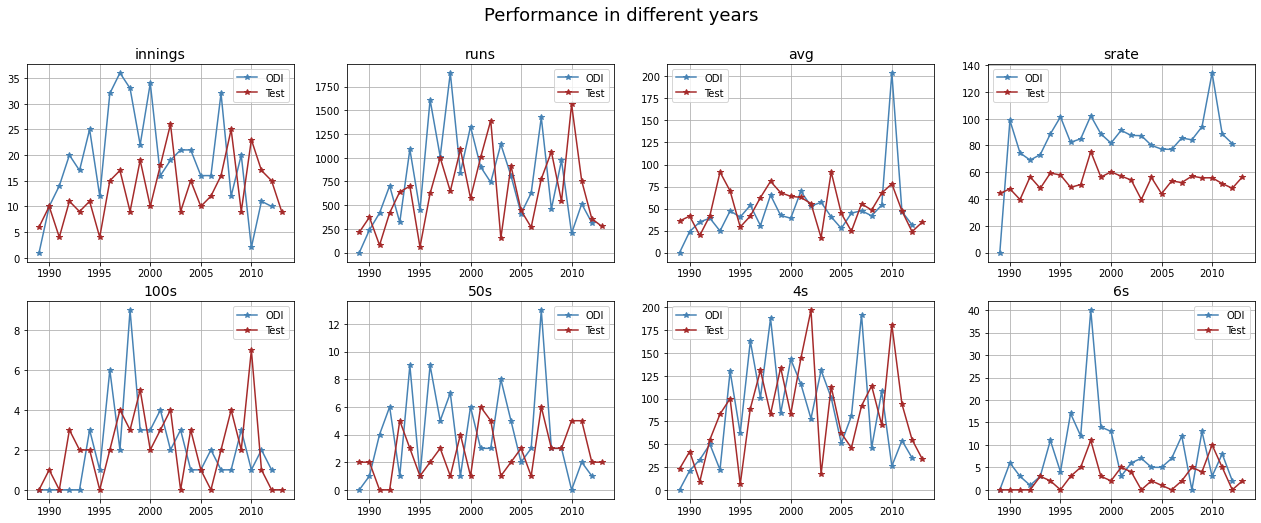

In [63]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize = (22,8))
fig.suptitle('Performance in different years', fontsize = 18)
ax = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
df = [y1,y2]
cols = ['innings','runs','avg','srate','100s','50s','4s','6s']
for i in range(8):
    ax[i].plot(df[0].year,df[0][cols[i]],label = 'ODI',color = 'steelblue', marker = '*')
    ax[i].plot(df[1].year,df[1][cols[i]],label = 'Test', color = 'brown',  marker = '*')                                        
    ax[i].legend()
    ax[i].set_title(f'{cols[i]}', fontsize = 14)
    ax[i].grid()

The above plots gives us the picture of how Sachin performance varied over the years in the aspects of number of innings batted, runs scored, averages, strike rate, 100s, 50s, 6s and 4s. It is helpful in understanding how each aspect varied from time to time. We will be needing to consider more than one aspect to understand the overall performance. We will make use of number of innings played, runs and average to understand the scoring ability. Strike rate, 6s and 4s will help us to understand the how fast the runs were scored over the years. 100s and 50s will be helpful to understand how well higher scores were scored over the years

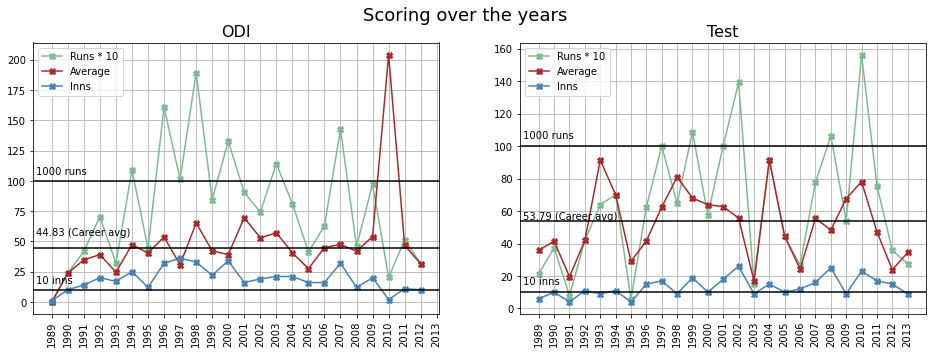

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(16,5))
fig.suptitle('Scoring over the years', fontsize = 18)
df= [y1,y2]
ax = [ax1,ax2]
title = ['ODI','Test']
for i in range(2):
    ax[i].plot(df[i].year, df[i].runs/10, label = 'Runs * 10',  marker = 'X')
    ax[i].plot(df[i].year, df[i].avg, color = 'brown', marker = 'X', label = 'Average')
    ax[i].plot(df[i].year, df[i].innings, label = 'Inns', color = 'steelblue',  marker = 'X')
    ax[i].set_xticks(range(1989,2014))
    ax[i].legend()
    avg = round(df[i].runs.sum()/(df[i].innings.sum()-df[i].notout.sum()),2)
    ax[i].axhline(avg, color = 'black')
    ax[i].text(1988,55, f'{avg} (Career avg)')
    ax[i].axhline(100, color = 'black')
    ax[i].text(1988,105, f'1000 runs')
    ax[i].axhline(10, color = 'black')
    ax[i].text(1988,15, f'10 inns')
    ax[i].tick_params(axis = 'x', labelrotation = 90)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].grid()

In odis, Sachin scored over 1000 or more runs 7 times in 1994, 1996,1997, 1998, 2000, 2003 and 2007. In tests, he scored  1000 or more runs 6 times in 1997, 1999, 2001, 2002, 2008 and 2010. Except for 1997, there is no year in which Sachin scored 1000 runs in a year in both tests and odis. When we take a look at the number of matches he played in these years, it can be observed that the general trend is if Sachin played more number of odis in a year he would have played less number of tests in that year or vice versa. 

In tests, 1993, 1994, 1997, 1998,1999, 2000, 2001, 2002, 2004, 2007, 2009 and 2010 were the years in which Sachin had played at least 10 inns and averaged considerably above his career average. 1990, 1992, 1996, 2003, 2005, 2006, 2012 and 2013 were the years in which he had played at least 10 innings and averaged considerably below his career average. So out of 24 years that he played tests, 12 years were purple patches, 8 were lean patches and the remaining were average or played less number of innings.

In odis, 1994, 1996, 1998, 2001, 2002, 2003, 2007, 2009 and 2011 are the years in which Sachin had played at least 10 inns and averaged considerably above his career average. 1991, 1992, 1997, 2005 and 2012 are the years in which he had played at least 10 innings and averaged considerably below his career average. So out of 22 years that he played odis, 9 years were purple patches, 5 were lean patches and the remaining were average or played less number of innings.



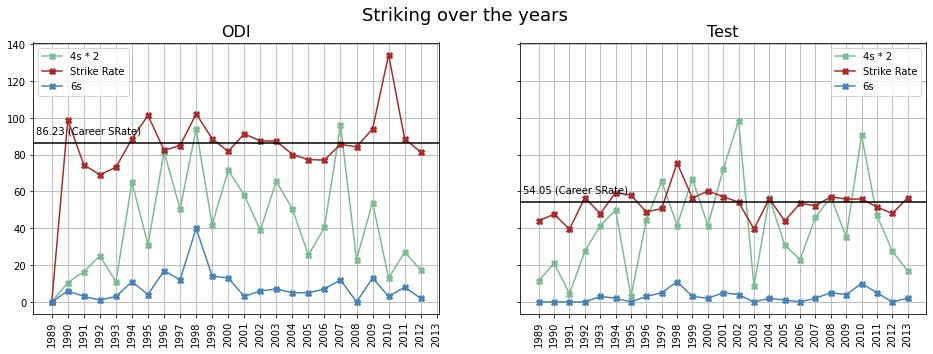

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(16,5), sharey = True)
fig.suptitle('Striking over the years', fontsize = 18)
df= [y1,y2]
ax = [ax1,ax2]
title = ['ODI','Test']
for i in range(2):
    ax[i].plot(df[i].year, df[i]['4s']/2, label = '4s * 2', marker = 'X')
    ax[i].plot(df[i].year, df[i].srate, color = 'brown', marker = 'X', label = 'Strike Rate')
    ax[i].plot(df[i].year, df[i]['6s'], label = '6s', color = 'steelblue', marker = 'X')
    ax[i].set_xticks(range(1989,2014))
    ax[i].legend()
    ax[i].tick_params(axis = 'x', labelrotation = 90)
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    avg = round(df[i].runs.sum()*100/df[i].balls.sum(),2)
    ax[i].axhline(avg, color = 'black')
    ax[i].text(1988,avg+5, f'{avg} (Career SRate)')
    ax[i].grid()

It is interesting to note that Sachin had hit 40 sixes in one year in 1998 in odis with the next best in odi was just 17 in 1996. He also had a strike rate of around 100 and nearly 100 4s in 1998. He was unargubly in his attacking best in 1998. 1990, 1995 and 1998 were the years with strike rate nearing or around 100. Strike rates from 1991 - 1993 and 2004-2006 were considerably low from this career strike rate. As far as tests concerned, strike rate of around 40 to 60 is mostly expected. The highest strike rate in a year was in 1998 nearing 80. There is no other year in whihc the strike rate is more than the career strike rate in tests.

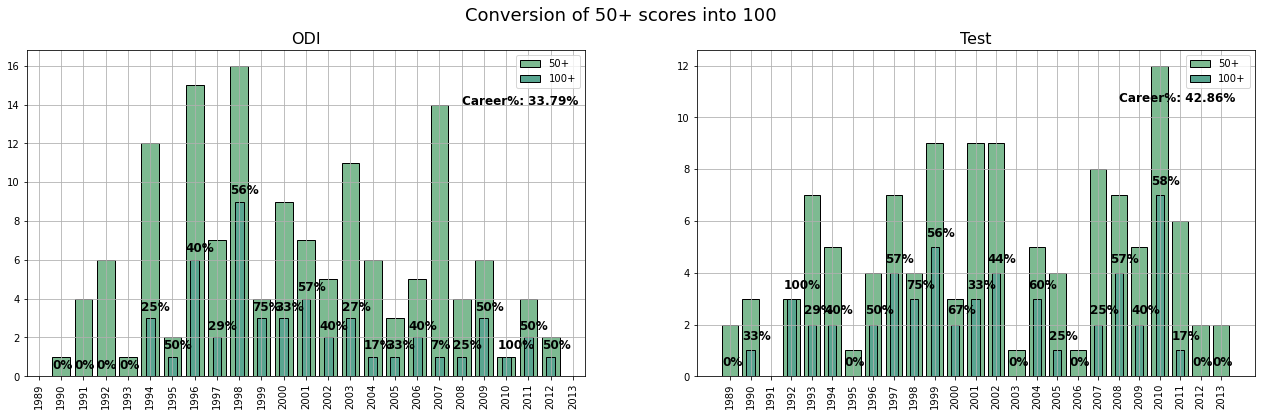

In [66]:
def fif2hun(df):
    fifabv = df[df.runs >= 50]['year'].value_counts().reset_index()
    hunabv = df[df.runs >=100]['year'].value_counts().reset_index()
    crossingFifties = fifabv.merge(hunabv, on = 'index', how = 'outer').fillna(0)
    crossingFifties.columns = ['year','50+','100+']
    crossingFifties['%'] = crossingFifties['100+']*100/crossingFifties['50+']
    return crossingFifties.sort_values(by = 'year')
fif2hunO = fif2hun(innO)
fif2hunT = fif2hun(innT)
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (22,6))
ax = (ax1,ax2)
df = [fif2hunO, fif2hunT]
title = ['ODI', 'Test']
fig.suptitle('Conversion of 50+ scores into 100', fontsize = 18)
for i in range(2):
    ax[i].bar(df[i].year, df[i]['50+'], edgecolor = 'black', label = '50+')
    ax[i].bar(df[i].year, df[i]['100+'], edgecolor = 'black', width = 0.4, label = '100+')
    ax[i].legend()
    ax[i].set_xticks(range(1989,2014))
    ax[i].tick_params(labelrotation = 90, axis = 'x')
    ax[i].set_title(f'{title[i]}', fontsize = 16)
    ax[i].grid()
    for j in range(len(df[i])):
        ax[i].text(df[i].year.iloc[j]-0.4, df[i]['100+'].iloc[j]+0.4, f'{round(df[i]["%"].iloc[j])}%'
                  , color = 'black', weight = 'bold', fontsize = 12)
ax1.text(2008,14,f'Career%: {round(len(innO[innO.runs>=100])*100/len(innO[innO.runs>=50]),2)}%'
        ,weight = 'bold', fontsize = 12)
ax2.text(2008,10.6,f'Career%: {round(len(innT[innT.runs>=100])*100/len(innT[innT.runs>=50]),2)}%'
        ,weight = 'bold', fontsize = 12)
plt.show()

In odis, the maximum number of 50s and 100s scored in 1998 and were 16 and 9 respectively. In tests, the maximum number of 50s and 100s in a year were 13 and 7 respectively and both were in 2010. In odis, there were no hundreds in the first four years. But once Sachin started scoring centuries, there was never a year without a century in odis. In tests, in the years 1991, 1995, 2003, 2006, 2012 and 2012, Sachin had not scored a century. In odis, Sachin had scored atleast a 50 in all years. In tests, Sachin had not scored a 50 or a 100 in 1991. He played just 4 innings in that year. 

The conversation rate of 50+ into 100+ in odis is 33.79%. In 2007, Sachin has 14 50+ scores out of which only one century which is around 7% the lowest conversion rate. He missed out scoring at least 3 centuries in that year as he was dismissed on 99 three times in the year. Overall, Sachin got out in 90s 18 times in odis of this 6 times(33.33%) in 2007. Code for this finding  as follows



In [67]:
len(innO[(innO.runs.between(90,99)) &(innO.year == 2007)]), len(innO[(innO.runs.between(90,99))])

(6, 18)

1997, 2004, 2005 and 2008 were the other years in which the conversion rate was comparatively low. In tests, conversion rate was low in the years 1990, 1993, 2005, 2007, 2011, 2012 and 2013.Conversion rate of 58% was the highest in 2010. In the last three years, Sachin had 10 50+ scores out of which there was only one 100+.

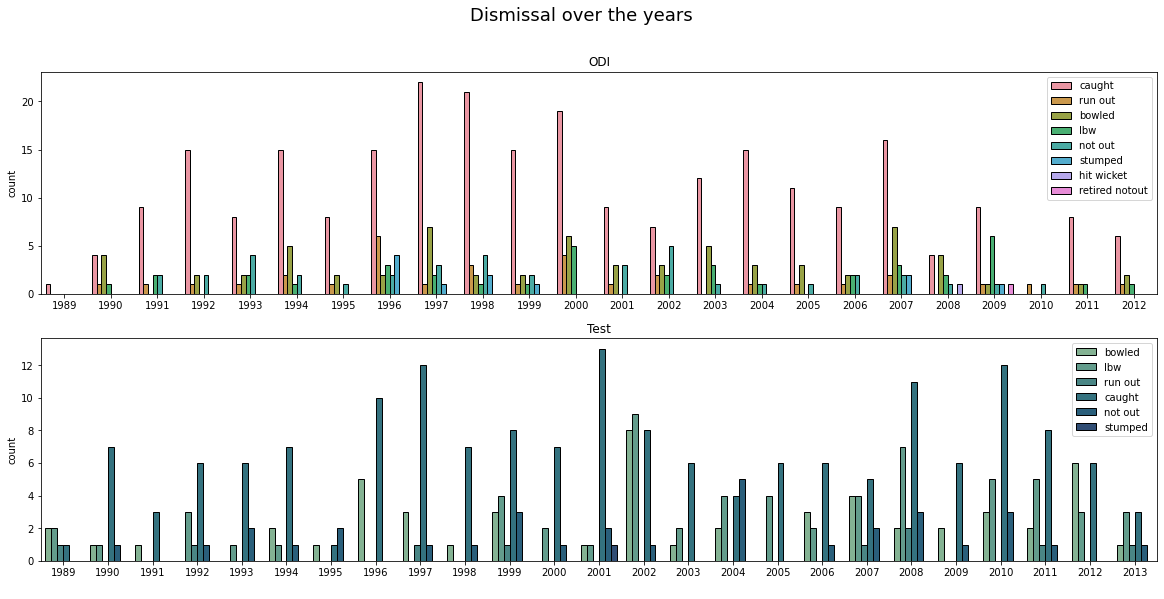

In [68]:
fig , (ax1, ax2) = plt.subplots(2, 1 , figsize = (20,9))
fig.suptitle('Dismissal over the years', fontsize = 18)
df = [innO, innT]
title = ['ODI', 'Test']
ax = [ax1,ax2]
for i in range(2):
    sns.countplot(df[i].year, hue = df[i].dismissal, edgecolor = 'black', ax = ax[i])
    ax[i].legend(loc = 'upper right')
    ax[i].set_title(f'{title[i]}')
    ax[i].set_xlabel(' ')

There is no much variation in the dismissals over the years as it reflects the general distribution as we have seen in the above plots. Plotting a count plot to understand how batting position has vaired over the years. 

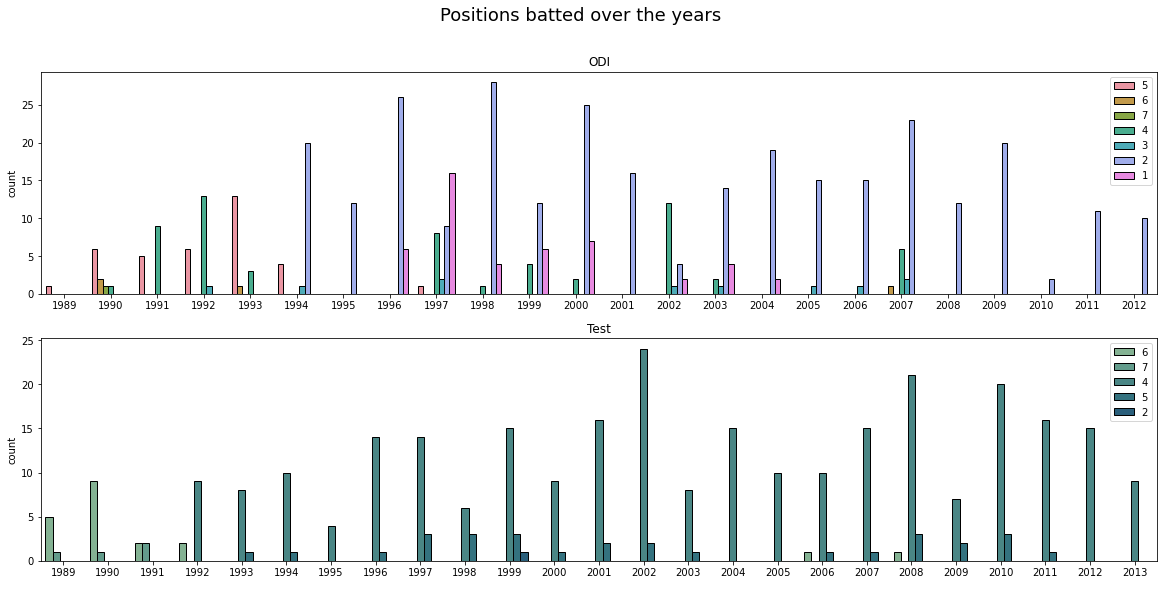

In [69]:
fig , (ax1, ax2) = plt.subplots(2, 1 , figsize = (20,9))
fig.suptitle('Positions batted over the years', fontsize = 18)
df = [innO, innT]
title = ['ODI', 'Test']
ax = [ax1,ax2]
for i in range(2):
    sns.countplot(df[i].year, hue = df[i].position, edgecolor = 'black', ax = ax[i])
    ax[i].legend(loc = 'upper right')
    ax[i].set_title(f'{title[i]}')
    ax[i].set_xlabel(' ')

In odis, the most favorite position was No. 2. He had not batted in that position in the first 5 years. He started opening from 1994 and continued opening till the end of his career. For the last five years, it is the only position that he batted. In 1997, though he played mostly as an opener, he mostly played as striking opener(no 1) rather non striking opener(no 2). 

In tests, the most favorite position was No. 4.which he started playing at from 1992. He opened a test innings only once that in 1999. Except for that, he never batted in a position higher than No. 4.


We so far used Matplotlib and Seaborn for visualization. For now on, we will be using plotly to explore the library for its interactive features like map plots and more. 

Creating an animated scatter plot to visualize the total runs scored over the years in odi and tests by Sachin

In [70]:
r1 = innO.groupby('year')['year','runs'].sum().reset_index()
r1['format'] = ['odi' for x in range(len(r1))]
r1.loc[len(r1.index)] = [2013, 0, 'odi']
r1['runs'] = r1['runs'].cumsum().tolist()
r2 = innT.groupby('year')['year','runs'].sum().reset_index()
r2['format'] = ['test' for x in range(len(r2))]
r2['runs'] = r2['runs'].cumsum().tolist()
runs = pd.concat([r1,r2])
fig = px.scatter(runs, x="year", y="runs", size = 'runs', color = 'format', hover_name = 'format', animation_frame = 'year'
          , range_x = (1988, 2015), range_y = (0, 22000), labels = {'year': 'Year', 'runs': 'Runs'},
          title = 'Total runs in odi and test: Animation', height = 600, text = 'runs', 
                 size_max = 35, color_discrete_map = {'odi':'white', 'test':'red'})
fig.update_traces(textposition = 'top left')

From the above animation, it can be observed that till 1994 - 1995, total runs in odis was mostly behind total runs in tests. From there on, odi runs started taking gradual lead which was maintained till the end of the career even with one year of no odis. It is also visible that huge difference in the runs between odi and test runs in the mid of his career was somewhat reduced as Sachin scored more runs in tests towards the end of his career. To observe this quantitively, plotting an animated scatter plot with plotly express representing the difference between total runs in odis and total runs in tests over the years.

In [71]:
diff = (r1['runs']-r2['runs'])
fig = px.line(x = r1['year'],y = diff, labels= {'x': 'Year', 'y': 'Runs'}, 
        title = 'Difference of runs in ODIs from runs in tests', text =  diff
        , range_x = (1988,2015),
             range_y = (-400, 5500))
fig.update_traces(textposition = 'top right' )
fig.update_layout(xaxis = {'dtick': 1})
fig.show()

We can observe that the difference between total runs in odis from total runs in tests was the lowest in 1992 with -349 runs. From 1994, the difference is positive and the same maintained till the end of his career with the highest of 4596 runs in 2007. The reason for this upward trend from 1994 is Sachin started to opening in odis which allowed him to score runs freely from thereon. Towards the end of his career, the difference which was 4424 runs in 2009 shrunk to 2505 runs in 2013. 

**Performance in different countries**

We will look at the performance of Sachin in different ground considering the top 10 grounds in terms of runs. We then will look at the performance of Sachin in different countries and understand where his performance was outstanding and where it was below par. 

Plotting a bar chart representing the performance of Sachin at top 10 grounds in terms of runs. For this purpose, we are getting a aggregate table from the datasets 

In [72]:
def ground(df):
    ground = df.groupby('ground')['runs','notout'].sum().reset_index().sort_values(by='runs', ascending = False)
    matches = df.ground.value_counts().reset_index()
    matches.columns = ['ground','inns']
    ground = ground.merge(matches)
    ground['average'] = round(ground['runs'] /( ground['inns'] - ground['notout']),2)
    return ground.head(10)
g1, g2 = ground(innO), ground(innT)
g1

ground  runs  notout  inns  average
0             Sharjah  1778       5    42    48.05
1       Colombo (RPS)  1096       3    26    47.65
2               Dhaka   808       0    15    53.87
3              Nagpur   548       0     9    60.89
4           Bengaluru   534       0    11    48.55
5  Hyderabad (Deccan)   530       2     7   106.00
6             Gwalior   529       1     9    66.12
7             Kolkata   496       2    12    49.60
8             Cuttack   469       2    10    58.62
9              Mumbai   455       0    11    41.36

In [73]:
g2

ground  runs  notout  inns  average
0         Nagpur   970       2    15    74.62
1        Chennai   970       5    16    88.18
2         Mumbai   921       0    19    48.47
3        Kolkata   872       2    21    45.89
4      Bengaluru   869       2    16    62.07
5         Sydney   785       4     9   157.00
6         Mohali   767       2    18    47.94
7          Delhi   759       1    19    42.17
8  Colombo (SSC)   698       2     9    99.71
9      Ahmedabad   642       1    16    42.80

In [74]:
df = [g1,g2]
title = ['ODI','Test']
for i in range(2):
    fig = px.bar(df[i], x = 'ground', y='runs',color = 'average', hover_data = ['average','inns'], 
                 height = 400, text = 'runs', title = f'Performance at top 10 grounds ({title[i]})')
    fig.show()

In [75]:
print(f' In odis, Sachin has played in {innO.ground.nunique()} different grounds. In tests, he played in {innT.ground.nunique()} different grounds')

 In odis, Sachin has played in 89 different grounds. In tests, he played in 55 different grounds


In odis, Sachin scored 1778 runs at Sharjah, his highest in a ground. Also he played 42 innings at Sharjah, his highest number of innings played at any ground. Followed by Sharjah, Sachin played most of innings(26) and runs(1096) at Colombo. At 3, Dhaka with 808 runs in 15 innings. It is interesting to note that the top 3 grounds that he played and scored most runs is outside of India. Nagpur is the Indian ground with most runs for Sachin with 548 runs, followed by Bangaluru, Hyderabad, Gwalior, Kolkata, Cuttack and Mumbai. In all top 10 grounds that Sachin scored, he averaged above his career average except for Mumbai. He had a surreal average of 105 at Hyderadad. 

In tests, Sachin scored 970 runs, the most at a ground at Nagpur and Chennai from 15 innings and 16 innings respectively and has an average of 74.62 and 88.18 respectively. Sydney and Colombo(SSC) are the foregin ground in the top 10 ground in terms of runs. He scored 785 runs at Sydney with the average of 157 and 698 runs at Colombo(SSC) with the average of 99.71. Along with the above four grounds, he had an average above his Career average at Bangaluru with 62.07. In other grounds in the top 10 grounds, he scored good but the average is below the career average.

To analysis performance against different countries, creating a aggregate table grouping by country

In [76]:
def country(df):
    matches = df.country.value_counts().reset_index()
    runs = df.groupby('country')['country','runs','balls','6s','4s','notout'].sum().reset_index()
    matches.columns = ['country','matches']
    df1 = matches.merge(runs)
    df1['avg'] = round(df1['runs'] / (df1['matches']-df1['notout']),2)
    df1['srate'] = round(df1['runs']*100/df1['balls'],2)
    df1['b/inns'] = round((df1['6s']+df1['4s'])/df1.matches)
    hund = []
    fift = []
    for team in df1.country:
        fif = df[(df['country'] == team) & (df['runs'].between(50,99))].count()[0]
        fift.append(fif)
        hun = df[(df['country'] == team) & (df['runs'] >= 100)].count()[0]
        hund.append(hun)
    df1['100s'] = hund
    df1['50s'] = fift
    df1['high_scorePc'] = round(((df1['100s']+df1['50s'])*100)/df1['matches'], 2)
    df1['bounPerInn'] = round((df1['4s']+df1['6s'])/df1.matches)
    return df1.sort_values(by = 'country').reset_index(drop = True)
c1 = country(innO)
c2 = country(innT)
c1

country  matches  runs  balls  6s   4s  notout    avg  srate  \
0              Australia       46  1491   1981   1  140       3  34.67  75.27   
1             Bangladesh       16   827    839  13   94       0  51.69  98.57   
2                 Canada       11   313    467   5   31       2  34.78  67.02   
3                England       26  1051   1189  10  130       2  43.79  88.39   
4                  India      160  6976   7892  71  811      15  48.11  88.39   
5                Ireland        4   204    260   2   28       0  51.00  78.46   
6                  Kenya        4   171    205   4   21       0  42.75  83.41   
7              Malayasia        4   222    277   5   23       1  74.00  80.14   
8            New Zealand       22   821    843  12   97       1  39.10  97.39   
9               Pakistan       13   480    541   5   66       0  36.92  88.72   
10             Singapore        5   253    285   5   25       0  50.60  88.77   
11          South Africa       35  1249   1618   7  128       0  35.69  77.19   
12             Sri Lanka       41  1531   1870  16  136       5  42.53  81.87   
13  United Arab Emirates       42  1778   1916  30  168       5  48.05  92.80   
14           West Indies        9   282    312   5   26       3  47.00  90.38   
15              Zimbabwe       14   777    873   4   92       4  77.70  89.00   

    b/inns  100s  50s  high_scorePc  bounPerInn  
0      3.0     1   10         23.91         3.0  
1      7.0     2    5         43.75         7.0  
2      3.0     0    3         27.27         3.0  
3      5.0     3    4         26.92         5.0  
4      6.0    20   38         36.25         6.0  
5      8.0     0    2         50.00         8.0  
6      6.0     0    1         25.00         6.0  
7      7.0     1    1         50.00         7.0  
8      5.0     1    5         27.27         5.0  
9      5.0     2    1         23.08         5.0  
10     6.0     1    1         40.00         6.0  
11     4.0     3    5         22.86         4.0  
12     4.0     5    6         26.83         4.0  
13     5.0     7    7         33.33         5.0  
14     3.0     0    3         33.33         3.0  
15     7.0     3    4         50.00         7.0

In [77]:
c2

country  matches  runs  balls  6s   4s  notout     avg  srate  b/inns  \
0     Australia       38  1809   3067   7  209       4   53.21  58.98     6.0   
1    Bangladesh        9   820   1294   4   87       3  136.67  63.37    10.0   
2       England       30  1575   2917   5  227       1   54.31  53.99     8.0   
3         India      153  7216  13572  36  943      16   52.67  53.17     6.0   
4   New Zealand       18   842   1469   6  113       1   49.53  57.32     7.0   
5      Pakistan       13   483    964   0   58       1   40.25  50.10     4.0   
6  South Africa       28  1161   2348   5  172       3   46.44  49.45     6.0   
7     Sri Lanka       19  1155   2070   4  137       2   67.94  55.80     7.0   
8   West Indies       14   620   1313   1   82       1   47.69  47.22     6.0   
9      Zimbabwe        7   240    443   1   30       1   40.00  54.18     4.0   

   100s  50s  high_scorePc  bounPerInn  
0     6    7         34.21         6.0  
1     5    0         55.56        10.0  
2     4    8         40.00         8.0  
3    22   32         35.29         6.0  
4     2    5         38.89         7.0  
5     1    2         23.08         4.0  
6     5    3         28.57         6.0  
7     5    4         47.37         7.0  
8     1    5         42.86         6.0  
9     0    2         28.57         4.0

Using choropleth, creating a world map representing the countries in which he played with highlighting the runs, average and matches. Since West Indies and England are not in the list of choropleth country names, they are being represented as Dominican Republic and United Kingdom.

In [78]:
df1, df2 = c1, c2
df1.country.replace({'England' : 'United Kingdom', 'West Indies': 'Dominican Republic'}, inplace = True)
df2.country.replace({'England' : 'United Kingdom', 'West Indies': 'Dominican Republic'}, inplace = True)
df = [df1, df2]
title = ['ODI','Test']
for i in range(2):
    ctmap = px.choropleth(df[i], locations = 'country', color = 'avg',locationmode = 'country names', 
                 color_continuous_scale="viridis", title = f'Runs in different countries {title[i]}',
                         hover_data = ['avg','runs','matches'])
    ctmap.show()

In both odis and tests, Sachin scored maximum number of runs in India. In odis, he averaged between 34 and 37 in Australia, Canada, South Africa and Pakistan which is considerably less than his career average(44.8). He averaged 39.1 in New Zealand. Averages in other countries were near or considerably higher than the career average. Sachin played more than 50% of the odis innings in India and UAE and he averaged 48.11 and 48.05. 

In tests, he averaged more than 40 in all the countries. In South Africa, West Indies, Zimbabwe, Pakistan and New Zealand, his averages were considerably lower than the career average. In India, Australia, Sri Lanka, England and Bangladesh, his averages were near or considerably higher than the career average. 

Plotting grouped bar chart to visualize the number of 50s and 100s scored in different countries.


In [79]:
c1.country.replace({'United Kingdom' : 'England', 'Dominican Republic':'West Indies'}, inplace = True)
c2.country.replace({'England' :'United Kingdom', 'Dominican Republic' : 'West Indies'}, inplace = True)
df = [c1, c2]
for i in range(2):
    fig = px.bar(df[i], x = 'country', y = ['100s','50s'], height = 400, barmode='group'
                ,labels = {'value':'count'}, hover_data = ['matches','high_scorePc'])
    fig.show()

In odis, Sachin had scored 50s in all countries that he played. He had not scored century in West Indies, Ireland, Kenya and Canada. He played not more than 11 innings in these countries. He had scored 20 100s and 38 50s in India. 

Since the number of matches vary, to understand how well Sachin scored 50+ scores in different countries, we have the high_scorePc( high score percentage), calculated by percentage of 50+ scores against the total number of matches. This can be viewed in the above plot as a hover data. Barring the countries in which Sachin played not more than 10 matches, his 50+ score % is the lowest in South Africa with just 22.86%, followed by Pakistan with 23.08%, Australia with 23.91%, Sri Lanka with 26.83%, Canada and New Zealand with each 27.27%. In the above countries, a 50+ score came for every 5 to 4 innings. In India(36.25%), Bangladesh(43.75%), Zimbabwe(50%) and UAE (33.33%), 

In Tests, Sachin had scored century in all countries he played except in Zimbabwe. He has 22 100s and 32 50s in India. Except in Pakistan, South Africa and Zimbabwe, Sachin had 50+ score in every 3rd or 2nd match in all countries. In pakistan, Pakistan South Africa and Zimbabwe, 50+ score came in every 4th or 5th match. 

Plotting grouped bar chart to visualize the 4s and 6s scored in different countries

In [80]:
df = [c1, c2]
title = ['ODI', 'Test']
for i in range(2):
    fig = px.bar(df[i], x = 'country', y = ['4s','6s'], height = 400, 
                 title = f'Boundaries in different country({title[i]})', barmode = 'group', 
                 hover_data = ['bounPerInn', 'matches'])
    fig.show()

In odis, it is intesting to note that Sachin hit only one six in Australia in the 46 innings that he played there. He hit 140 fours in Australia with just 3 boundaries per innings in Australia. Sachin also has 3 boundaries per innings in Canada and West Indies as well. In innings played in Ireland, he has 8 boundaries per innings which is the highest. He has 7 boundaries per innings in Zimbabwe, Malaysia and Bangladesh, 6 boundaries per innings in India, Kenya and Singpore. 5 boundaries per innings in England, UAE, New Zealand and Pakistan and 4 in Sri Lanka and South Africa. Sachin has hit 811 fours and 71 sixes in India.

In tests, Sachin had not hit a six in Pakistan and had hit only one six in West Indies and Zimbabwe. The lowest boundaries per innings was in Zimbabwe and Pakistan with 4 boundaries per innings. He had 10 boundaries per innings in Bangladesh, the highest, 8 in England, 7 in New Zealand and Sri Lanka, 6 in India, Australia, South Africa and Sri Lanka. He hit 943 fours and 36 sixes in India.

Creating table to analyse 

In [81]:
def macro_stats(df1, place): 
    inns = len(df1)
    runs = df1.runs.sum()
    avg = round(df1.runs.sum()/(len(df1) - df1.notout.sum()), 2)
    fif = len(df1[df1.runs.between(49,99)])
    hun = len(df1[df1.runs.between(100,300)])
    srate =round((round(df1.runs.sum()*100)/(df1.balls.sum())), 2)
    hscore = df1.runs.max()
    sixes = df1['6s'].sum()
    fours = df1['4s'].sum()
    bounPerInn = round((sixes + fours)/inns)
    fiftyplusPC = round((hun+fif)*100/inns, 2)
    hunconPC = round((hun*100)/(fif+hun), 2)
    dict = {
        'Description' : ['Innings','Runs' ,'Average', '100s','50s','Strike Rate','4s','6s', 
                         'High Score', 'Boundaries/Inns', '50+ scorePerCent', 'Conversion to 100+Percent'],
        place : [inns,runs,avg,hun,fif, srate,fours,sixes, hscore, bounPerInn, fiftyplusPC, hunconPC]
    }
    return pd.DataFrame(dict)
home = macro_stats(innO[(innO.country == "India")],"Home")
away = macro_stats(innO[(innO.country != "India")], "Away")
sena = macro_stats(innO[((innO.country == "Australia")|(innO.country == "England")
                          |(innO.country == "New Zealand")|(innO.country == "South Africa"))], 'SENA')
subcon = macro_stats(innO[((innO.country == "India")|(innO.country == "Sri Lanka")
                          |(innO.country == "Pakistan")|(innO.country == "Bangladesh"))], 'Sub Continent')
overall = macro_stats(innO, "Overall")
region = [home, away, sena, subcon]
for i in range(len(region)):
    overall = overall.merge(region[i], on = 'Description')
overall = overall.set_index('Description')
print(' \033[1m ODI stats in difference conditions\n')
overall

  ODI stats in difference conditions



Overall     Home      Away     SENA  Sub Continent
Description                                                                   
Innings                      452.00   160.00    292.00   129.00         230.00
Runs                       18426.00  6976.00  11450.00  4612.00        9814.00
Average                       44.83    48.11     43.05    37.50          46.73
100s                          49.00    20.00     29.00     8.00          29.00
50s                           98.00    38.00     60.00    25.00          50.00
Strike Rate                   86.23    88.39     84.97    81.90          88.08
4s                          2016.00   811.00   1205.00   495.00        1107.00
6s                           195.00    71.00    124.00    30.00         105.00
High Score                   200.00   200.00    163.00   163.00         200.00
Boundaries/Inns                5.00     6.00      5.00     4.00           5.00
50+ scorePerCent              32.52    36.25     30.48    25.58          34.35
Conversion to 100+Percent     33.33    34.48     32.58    24.24          36.71

In ODIs, Sachin has an average of 48.11 at Home while he averaged 43.05 away. In terms of conditions, In SENA countries he averaged 37.5 while he averaged 46.73 in the Indian subcontinent. Sachin had a below par average in the SENA countires comparing to his career average. Also his lowest performance in other aspects were also in SENA countries. Boundaires per inns was 4 in SENA countries while it is 6 per inns in Home. Only 25.58% of the scores of 50+ in SENA while it is 36.25% in Home. Also conversion of 50+ into 100 was also the lowest in SENA with just 24.24%. his batting performance in SENA condition has negatively influenced his overall odi statistics and his away performance. Performance is the best in home and better in away as well as subcontinent as well

In [82]:
home = macro_stats(innT[(innT.country == "India")],"Home")
away = macro_stats(innT[(innT.country != "India")], "Away")
sena = macro_stats(innT[((innT.country == "Australia")|(innT.country == "England")
                          |(innT.country == "New Zealand")|(innT.country == "South Africa"))], 'SENA')
subcon = macro_stats(innT[((innT.country == "India")|(innT.country == "Sri Lanka")
                          |(innT.country == "Pakistan")|(innT.country == "Bangladesh"))], 'Sub Continent')
overall = macro_stats(innT, "Overall")
region = [home, away, sena, subcon]
for i in range(len(region)):
    overall = overall.merge(region[i], on = 'Description')
overall = overall.set_index('Description')
print(' \033[1m Test stats in difference conditions\n')
overall

  Test stats in difference conditions



Overall     Home     Away     SENA  Sub Continent
Description                                                                  
Innings                      329.00   153.00   176.00   114.00         194.00
Runs                       15921.00  7216.00  8705.00  5387.00        9674.00
Average                       53.79    52.67    54.75    51.30          56.24
100s                          51.00    22.00    29.00    17.00          33.00
50s                           70.00    33.00    37.00    24.00          39.00
Strike Rate                   54.05    53.17    54.80    54.96          54.04
4s                          2058.00   943.00  1115.00   721.00        1225.00
6s                            69.00    36.00    33.00    23.00          44.00
High Score                   248.00   217.00   248.00   241.00         248.00
Boundaries/Inns                6.00     6.00     7.00     7.00           7.00
50+ scorePerCent              36.78    35.95    37.50    35.96          37.11
Conversion to 100+Percent     42.15    40.00    43.94    41.46          45.83

Constrast to the odis, in tests, his performance in SENA countries on par with other conditions almost in all aspects. 

**Section III - Predictive Analysis**



In [83]:
innO.columns

Index(['runs', 'balls', '4s', '6s', 'srate', 'position', 'dismissal', 'inns',
       'opposition', 'ground', 'matchNo', 'month', 'year', 'notout',
       'country'],
      dtype='object')

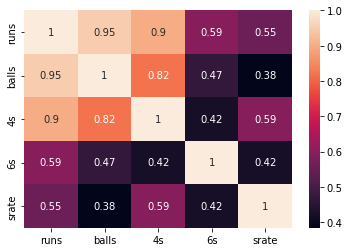

In [84]:
sns.heatmap(innO[['runs', 'balls','4s','6s','srate']].corr(),annot = True)
plt.show()

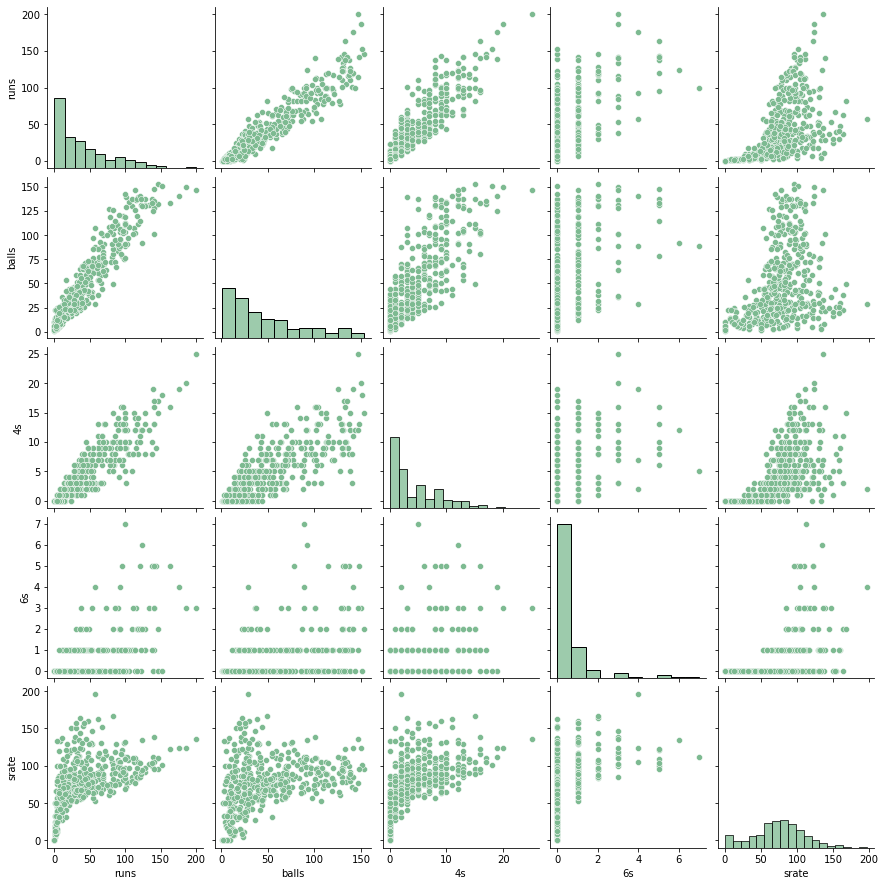

In [85]:
sns.pairplot(innO[['runs', 'balls','4s','6s','srate']])

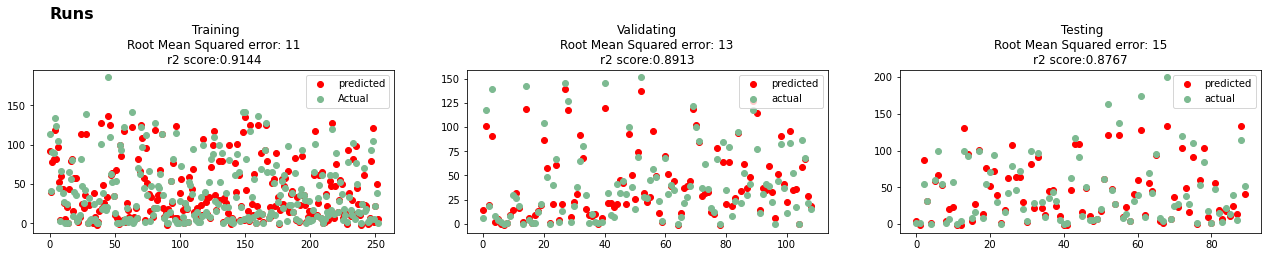

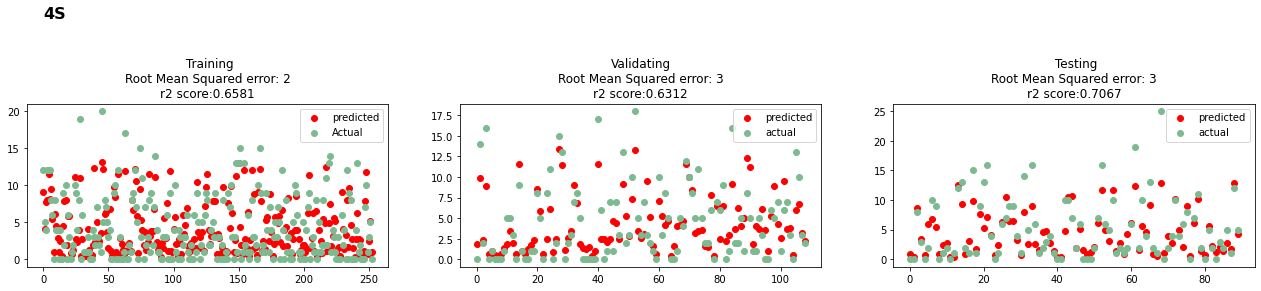

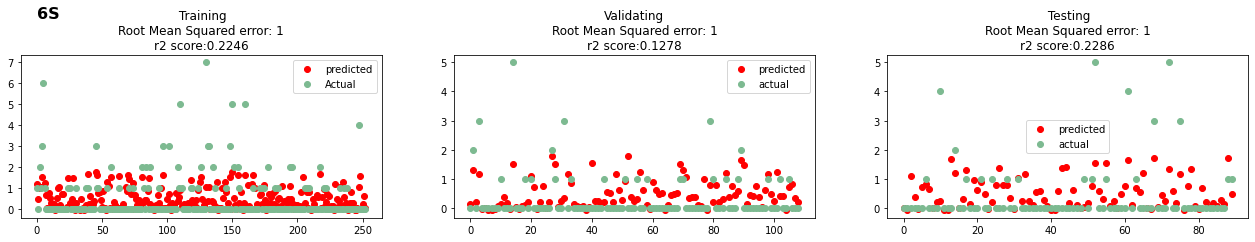

In [86]:
for i in ['runs','4s','6s']:    
    X = innO.loc[0:len(innO)*80/100,['balls']]
    y = innO.loc[0: len(innO)*80/100 ,[i]]
    Xt = innO.loc[len(innO)*80/100: ,['balls']]
    yt = innO.loc[len(innO)*80/100:,[i]]
    X_tr,X_te,y_tr,y_te = train_test_split(X,y, random_state=52, test_size=0.3)
    model = LinearRegression()
    model.fit(X_tr,y_tr)
    p1 = model.predict(X_tr)
    p2 = model.predict(X_te)
    p3 = model.predict(Xt)
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (22,3))
    ax1.text(0,innO[i].max()+0.3*innO[i].max(),f'{i.title()}', fontsize = 16, weight = 'bold')
    ax1.scatter(range(len(y_tr)),p1, color = 'red',label = 'predicted')
    ax1.scatter(range(len(y_tr)),y_tr, label = 'Actual')
    ax1.set_title(f' Training\nRoot Mean Squared error: {round(np.sqrt(mse(y_tr, p1)))}\nr2 score:{round(r2_score(y_tr, p1),4)}')
    ax1.legend()
    ax2.scatter(range(len(y_te)),p2, color = 'red',label = 'predicted')
    ax2.scatter(range(len(y_te)),y_te, label = 'actual')
    ax2.legend()
    ax2.set_title(f'Validating\nRoot Mean Squared error: {round(np.sqrt(mse(y_te,p2)))}\nr2 score:{round(r2_score(y_te, p2),4)}')
    ax3.scatter(range(len(yt)),p3, color = 'red',label = 'predicted')
    ax3.scatter(range(len(yt)),yt, label = 'actual')
    ax3.legend()
    ax3.set_title(f' Testing\nRoot Mean Squared error: {round(np.sqrt(mse(yt, p3)))}\nr2 score:{round(r2_score(yt, p3),4)}')

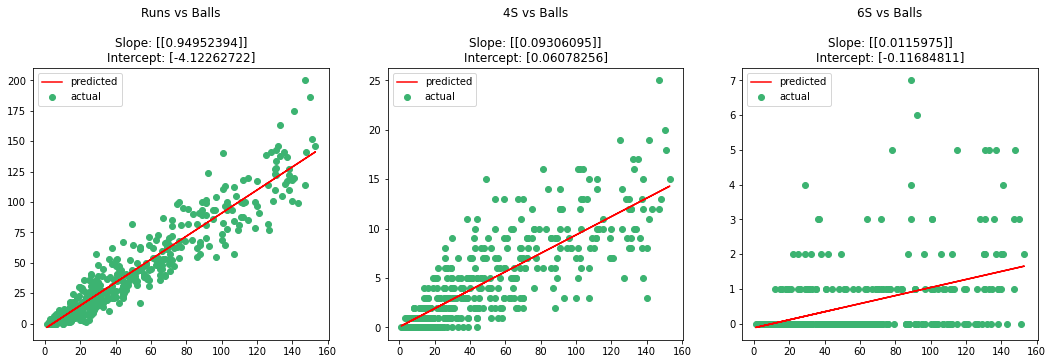

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
ax = [ax1,ax2,ax3]
iv = ['runs','4s','6s']
for i in range(3):
    X = np.array(innO['balls']).reshape(len(innO), 1)
    y = np.array(innO[iv[i]]).reshape(len(innO), 1)
    model = LinearRegression()
    model.fit(X,y)
    pred = model.predict(X)
    ax[i].scatter(X, y, label = 'actual', color = 'mediumseagreen')
    ax[i].plot(X, pred, color = 'red', label = 'predicted')
    ax[i].legend(loc = 'upper left')
    ax[i].set_title(f'{iv[i].title()} vs Balls\n\nSlope: {model.coef_}\nIntercept: {model.intercept_}')

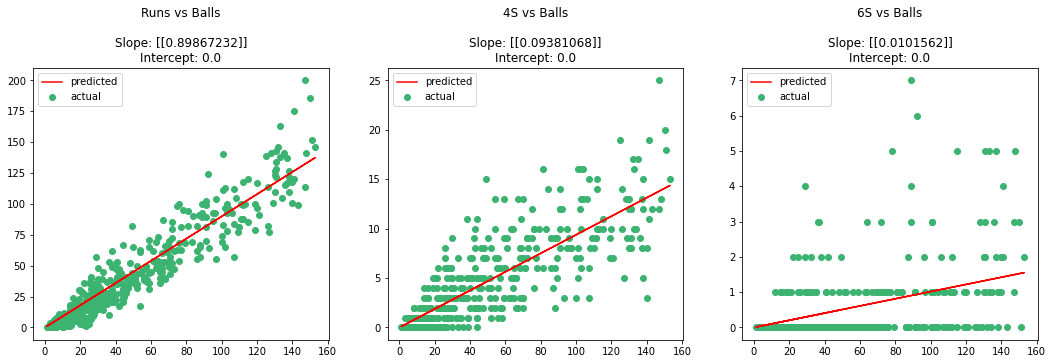

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
ax = [ax1,ax2,ax3]
iv = ['runs','4s','6s']
for i in range(3):
    X = np.array(innO['balls']).reshape(len(innO), 1)
    y = np.array(innO[iv[i]]).reshape(len(innO), 1)
    model = LinearRegression(fit_intercept = False, normalize = True)
    model.fit(X,y)
    pred = model.predict(X)
    ax[i].scatter(X, y, label = 'actual', color = 'mediumseagreen')
    ax[i].plot(X, pred, color = 'red', label = 'predicted')
    ax[i].legend(loc = 'upper left')
    ax[i].set_title(f'{iv[i].title()} vs Balls\n\nSlope: {model.coef_}\nIntercept: {model.intercept_}')

In [89]:
X = np.array(innO['balls']).reshape(len(innO),1)
y = np.array(innO[['runs','4s','6s']]).reshape(len(innO),3)
model = LinearRegression(fit_intercept = False)
model.fit(X,y)
print(model.predict(np.array(1).reshape(1,1)))
print(model.predict(np.array(10).reshape(1,1)))
print(model.predict(np.array(100).reshape(1,1)))

[[0.89867232 0.09381068 0.0101562 ]]
[[8.98672316 0.93810684 0.10156205]]
[[89.86723161  9.38106838  1.01562049]]


In [90]:
X = np.array(innO['balls']).reshape(len(innO),1)
y = np.array(innO[['runs','4s','6s']]).reshape(len(innO),3)
model = LinearRegression()
model.fit(X,y)
print(model.predict(np.array(1).reshape(1,1)))
print(model.predict(np.array(10).reshape(1,1)))
print(model.predict(np.array(100).reshape(1,1)))

[[-3.17310328  0.15384351 -0.10525061]]
[[ 5.37261216e+00  9.91392016e-01 -8.73128294e-04]]
[[90.82976656  9.36687711  1.04290173]]


In [91]:
def pred(balls):
    X = np.array(innO['balls']).reshape(len(innO),1)
    y = np.array(innO[['runs','4s','6s']]).reshape(len(innO),3)
    model = LinearRegression()
    model.fit(X,y)
    pred = model.predict(np.array(balls).reshape(1,1))
    runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
    if runs < 0: runs = 0
    return f'On facing {balls} ball(s), Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
for balls in range(10):
    print(pred(random.randint(1,200)))

On facing 29 ball(s), Sachin would score 23 run(s) with 3 four(s) and 0 six(es)
On facing 153 ball(s), Sachin would score 141 run(s) with 14 four(s) and 2 six(es)
On facing 129 ball(s), Sachin would score 118 run(s) with 12 four(s) and 1 six(es)
On facing 70 ball(s), Sachin would score 62 run(s) with 7 four(s) and 1 six(es)
On facing 74 ball(s), Sachin would score 66 run(s) with 7 four(s) and 1 six(es)
On facing 21 ball(s), Sachin would score 16 run(s) with 2 four(s) and 0 six(es)
On facing 108 ball(s), Sachin would score 98 run(s) with 10 four(s) and 1 six(es)
On facing 143 ball(s), Sachin would score 132 run(s) with 13 four(s) and 2 six(es)
On facing 8 ball(s), Sachin would score 3 run(s) with 1 four(s) and 0 six(es)
On facing 97 ball(s), Sachin would score 88 run(s) with 9 four(s) and 1 six(es)


In [92]:
def pred(balls, opposition):
    df = innO[innO.opposition == opposition]
    X = np.array(df['balls']).reshape(len(df),1)
    y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
    model = LinearRegression()
    model.fit(X,y)
    pred = model.predict(np.array(balls).reshape(1,1))
    runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
    if runs < 0: runs = 0
    return f'On facing {balls} ball(s) against {opposition}, Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
for opposition in innO.opposition.unique():
    print(pred(100, opposition))

On facing 100 ball(s) against Pakistan, Sachin would score 91 run(s) with 10 four(s) and 1 six(es)
On facing 100 ball(s) against New Zealand, Sachin would score 100 run(s) with 11 four(s) and 2 six(es)
On facing 100 ball(s) against Sri Lanka, Sachin would score 90 run(s) with 8 four(s) and 1 six(es)
On facing 100 ball(s) against England, Sachin would score 96 run(s) with 11 four(s) and 1 six(es)
On facing 100 ball(s) against West Indies, Sachin would score 82 run(s) with 8 four(s) and 1 six(es)
On facing 100 ball(s) against South Africa, Sachin would score 86 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Australia, Sachin would score 91 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Zimbabwe, Sachin would score 98 run(s) with 11 four(s) and 1 six(es)
On facing 100 ball(s) against U.A.E., Sachin would score 83 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Bangladesh, Sachin would score 75 run(s) with 9 four(s) and 1 six(es)
On f

In [93]:
def pred(balls, opposition):
    df = innO[innO.opposition == opposition]
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression(normalize = True)
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        return f'On facing {balls} ball(s) against {opposition}, Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
for opposition in innO.opposition.unique():
    print(pred(100, opposition))

On facing 100 ball(s) against Pakistan, Sachin would score 91 run(s) with 10 four(s) and 1 six(es)
On facing 100 ball(s) against New Zealand, Sachin would score 100 run(s) with 11 four(s) and 2 six(es)
On facing 100 ball(s) against Sri Lanka, Sachin would score 90 run(s) with 8 four(s) and 1 six(es)
On facing 100 ball(s) against England, Sachin would score 96 run(s) with 11 four(s) and 1 six(es)
On facing 100 ball(s) against West Indies, Sachin would score 82 run(s) with 8 four(s) and 1 six(es)
On facing 100 ball(s) against South Africa, Sachin would score 86 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Australia, Sachin would score 91 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Zimbabwe, Sachin would score 98 run(s) with 11 four(s) and 1 six(es)
Not enough data to predict
On facing 100 ball(s) against Bangladesh, Sachin would score 75 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) against Kenya, Sachin would score 101 run(s) with 1

In [94]:
def pred(balls, country):
    df = innO[innO.country == country]
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        return f'On facing {balls} ball(s) in {country}, Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
for country in innO.country.unique():
    print(pred(100, country))

On facing 100 ball(s) in Pakistan, Sachin would score 95 run(s) with 12 four(s) and 1 six(es)
On facing 100 ball(s) in New Zealand, Sachin would score 104 run(s) with 11 four(s) and 2 six(es)
On facing 100 ball(s) in United Arab Emirates, Sachin would score 96 run(s) with 8 four(s) and 2 six(es)
On facing 100 ball(s) in England, Sachin would score 98 run(s) with 12 four(s) and 1 six(es)
On facing 100 ball(s) in India, Sachin would score 94 run(s) with 10 four(s) and 1 six(es)
On facing 100 ball(s) in Australia, Sachin would score 77 run(s) with 6 four(s) and 0 six(es)
On facing 100 ball(s) in Zimbabwe, Sachin would score 92 run(s) with 11 four(s) and 0 six(es)
On facing 100 ball(s) in South Africa, Sachin would score 85 run(s) with 8 four(s) and 0 six(es)
On facing 100 ball(s) in Sri Lanka, Sachin would score 84 run(s) with 7 four(s) and 1 six(es)
On facing 100 ball(s) in Singapore, Sachin would score 92 run(s) with 9 four(s) and 1 six(es)
On facing 100 ball(s) in Canada, Sachin would 

In [95]:
def pred(balls, country, opposition):
    df = innO[(innO.country == country)&(innO.opposition == opposition)]
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        return f'On facing {balls} ball(s) in {country} against {opposition}, Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
print(pred(100,"India", "England"))
print(pred(100,"England", "England"))
print(pred(100,"India", "Australia"))
print(pred(100,"Australia", "Sri Lanka"))
print(pred(100,"Sri Lanka", "Sri Lanka"))

On facing 100 ball(s) in India against England, Sachin would score 100 run(s) with 11 four(s) and 2 six(es)
On facing 100 ball(s) in England against England, Sachin would score 92 run(s) with 12 four(s) and 1 six(es)
On facing 100 ball(s) in India against Australia, Sachin would score 93 run(s) with 11 four(s) and 1 six(es)
On facing 100 ball(s) in Australia against Sri Lanka, Sachin would score 87 run(s) with 10 four(s) and 0 six(es)
On facing 100 ball(s) in Sri Lanka against Sri Lanka, Sachin would score 88 run(s) with 6 four(s) and 1 six(es)


In [96]:
def pred(balls, country, opposition, inns):
    df = innO[(innO.country == country)&(innO.opposition == opposition)&(innO.inns == inns)]
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        if inns == '1': inns = 'first' 
        elif inns == '2': inns = 'second' 
        elif inns == '3': inns = 'third' 
        elif inns == '4': inns = 'fourth'
        else: 'Wrong input for inns'
        return f'On facing {balls} ball(s) in {country} against {opposition} in {inns} innings, Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)'
print(pred(100, 'Australia','Australia','1'))
print(pred(100, 'Australia','Australia','2'))
print(pred(100, 'England','England','1'))
print(pred(100, 'India','Sri Lanka','2'))

On facing 100 ball(s) in Australia against Australia in first innings, Sachin would score 70 run(s) with 5 four(s) and 0 six(es)
On facing 100 ball(s) in Australia against Australia in second innings, Sachin would score 86 run(s) with 7 four(s) and 0 six(es)
On facing 100 ball(s) in England against England in first innings, Sachin would score 88 run(s) with 11 four(s) and 1 six(es)
On facing 100 ball(s) in India against Sri Lanka in second innings, Sachin would score 89 run(s) with 11 four(s) and 0 six(es)


In [97]:
def pred(balls, *, country = "All", opposition = 'All', inns = 'All'):
    if country == 'All' and opposition == 'All' and inns == 'All':
        df = innO
        print('Overall')
    elif country == 'All' and opposition != 'All' and inns != 'All':
        df = innO[(innO.opposition == opposition)&(innO.inns == inns)]
        print(f'Against {opposition} in {inns} innings')
    elif country != 'All' and opposition == 'All' and inns != 'All':
        df = innO[(innO.country == country)&(innO.inns == inns)]
        print(f'In {country} in {inns} innings')
    elif country != 'All' and opposition != 'All' and inns == 'All':
        df = innO[(innO.opposition == opposition)&(innO.country == country)]
        print(f'Against {opposition} in {country}')
    elif country != 'All' and opposition == 'All' and inns == 'All':
        df = innO[(innO.country == country)]
        print(f'In {country}')
    elif country == 'All' and opposition != 'All' and inns == 'All':
        df = innO[(innO.opposition == opposition)]
        print(f'Against {opposition}')
    elif country == 'All' and opposition == 'All' and inns != 'All':
        df = innO[(innO.inns == inns)]
        print(f'{inns} innings')
    else:
        df = innO[(innO.country == country)&(innO.opposition == opposition)&(innO.inns == inns)]
        print(f'In {country} against {opposition} in {inns} innings')
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        return f'On facing {balls} ball(s), Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)\n'
print(pred(150))
print(pred(150, opposition = 'New Zealand'))
print(pred(150, opposition = 'New Zealand', country = 'India'))
print(pred(150, opposition = 'New Zealand', country = 'New Zealand'))
print(pred(150, opposition = 'New Zealand', country = 'New Zealand', inns = '1'))
print(pred(150, opposition = 'Australia', country = 'India', inns = '2'))

Overall
On facing 150 ball(s), Sachin would score 138 run(s) with 14 four(s) and 2 six(es)

Against New Zealand
On facing 150 ball(s), Sachin would score 152 run(s) with 16 four(s) and 3 six(es)

Against New Zealand in India
On facing 150 ball(s), Sachin would score 151 run(s) with 16 four(s) and 3 six(es)

Against New Zealand in New Zealand
On facing 150 ball(s), Sachin would score 159 run(s) with 16 four(s) and 3 six(es)

In New Zealand against New Zealand in 1 innings
On facing 150 ball(s), Sachin would score 154 run(s) with 15 four(s) and 3 six(es)

In India against Australia in 2 innings
On facing 150 ball(s), Sachin would score 157 run(s) with 17 four(s) and 3 six(es)



In [98]:
def pred(balls, *, country = "All", opposition = 'All', inns = 'All'):
    if country == 'All' and opposition == 'All' and inns == 'All':
        df = innT
        print('Overall')
    elif country == 'All' and opposition != 'All' and inns != 'All':
        df = innT[(innT.opposition == opposition)&(innT.inns == inns)]
        print(f'Against {opposition} in {inns} innings')
    elif country != 'All' and opposition == 'All' and inns != 'All':
        df = innT[(innT.country == country)&(innT.inns == inns)]
        print(f'In {country} in {inns} innings')
    elif country != 'All' and opposition != 'All' and inns == 'All':
        df = innT[(innT.opposition == opposition)&(innT.country == country)]
        print(f'Against {opposition} in {country}')
    elif country != 'All' and opposition == 'All' and inns == 'All':
        df = innT[(innT.country == country)]
        print(f'In {country}')
    elif country == 'All' and opposition != 'All' and inns == 'All':
        df = innT[(innT.opposition == opposition)]
        print(f'Against {opposition}')
    elif country == 'All' and opposition == 'All' and inns != 'All':
        df = innT[(innT.inns == inns)]
        print(f'{inns} innings')
    else:
        df = innT[(innT.country == country)&(innT.opposition == opposition)&(innT.inns == inns)]
        print(f'In {country} against {opposition} in {inns} innings')
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        return f'On facing {balls} ball(s), Sachin would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)\n'
print(pred(150))
print(pred(150, opposition = 'New Zealand'))
print(pred(150, opposition = 'New Zealand', country = 'India'))
print(pred(150, opposition = 'New Zealand', country = 'New Zealand'))
print(pred(150, opposition = 'New Zealand', country = 'New Zealand', inns = '1'))
print(pred(150, opposition = 'New Zealand', country = 'New Zealand', inns = '2'))

Overall
On facing 150 ball(s), Sachin would score 82 run(s) with 10 four(s) and 0 six(es)

Against New Zealand
On facing 150 ball(s), Sachin would score 79 run(s) with 10 four(s) and 0 six(es)

Against New Zealand in India
On facing 150 ball(s), Sachin would score 78 run(s) with 10 four(s) and 0 six(es)

Against New Zealand in New Zealand
On facing 150 ball(s), Sachin would score 81 run(s) with 10 four(s) and 0 six(es)

In New Zealand against New Zealand in 1 innings
On facing 150 ball(s), Sachin would score 60 run(s) with 6 four(s) and 0 six(es)

In New Zealand against New Zealand in 2 innings
On facing 150 ball(s), Sachin would score 97 run(s) with 15 four(s) and 0 six(es)



#Building the function by generalizing the dataset for any batsman to the runs, sixes and fours would be scored

In [101]:
def cricpred(player, form, balls, *, opposition ='All', inns = 'All'):
    form = form.lower()
    country = opposition.title()
    a = player.split(' ')[0]
    b = player.split(' ')[1]
    def urll(f,l):
        return f'https://www.google.com/search?q={f}+{l}+statsguru&rlz=1C1AVFC_enIN968IN971&oq={f}+{l}&aqs=chrome.0.69i59j46i67i433j0i67j0i67i433j0i433i512j0i67j69i60l2.6105j0j9&sourceid=chrome&ie=UTF-8'
    url = urll(a,b)
    wb = requests.get(url)
    bs = BeautifulSoup(wb.text)
    links = []
    for link in bs.find_all('a'):
        links.append(link)
    link = links[16]
    num = str(link).split('/')[7].split(".")[0]
    def furl(x):
        if form == 'test':
            return f'https://stats.espncricinfo.com/ci/engine/player/{x}.html?class=1;template=results;type=batting;view=innings'
        elif form == 'odi':
            return f'https://stats.espncricinfo.com/ci/engine/player/{x}.html?class=2;template=results;type=batting;view=innings'
        elif form == 't20':
            return f'https://stats.espncricinfo.com/ci/engine/player/{x}.html?class=3;template=results;type=batting;view=innings'
    url = furl(num)
    scrap = pd.read_html(url)
    df = scrap[3]
    df = df[['Runs','BF','4s','6s','Opposition','Inns']]
    df.columns = ['runs','balls','4s','6s','opposition', 'inns']
    drop_rows = df[(df.runs == 'TDNB') | (df.runs == 'DNB') | (df.runs == 'absent') ].index
    df.drop(drop_rows, inplace=True)
    df.runs = [i[:-1] if i[-1]=='*' else i for i in df.runs]
    df['balls'] = [0 if i[-1]=='-' else i for i in df['balls']]
    df['4s'] = [0 if i[-1]=='-' else i for i in df['4s']]
    df['6s'] = [0 if i[-1]=='-' else i for i in df['6s']]
    df['opposition'] = [country[2:] for country in df.opposition]
    if opposition == 'All' and inns == 'All':
        df = df
        print('Overall')
    elif opposition == 'All' and inns != 'All':
        df = df[(df.inns == inns)]
        print(f'In {inns} innings')
    elif opposition != 'All' and inns == 'All':
        df = df[(df.opposition == opposition)]
        print(f'Against {opposition}')
    else:
        df = df[(df.opposition == opposition)&(df.inns == inns)]
        print(f'Against {opposition} in {inns} innings')
    if len(df) < 5:
        return 'Not enough data to predict'
    else:
        X = np.array(df['balls']).reshape(len(df),1)
        y = np.array(df[['runs','4s','6s']]).reshape(len(df),3)
        model = LinearRegression()
        model.fit(X,y)
        pred = model.predict(np.array(balls).reshape(1,1))
        runs, fours, sixes = pred[0][0], pred[0][1], pred[0][2]
        if runs < 0: runs = 0
        print(f'On facing {balls} ball(s), {a.title()} {b.title()} would score {round(runs)} run(s) with {round(fours)} four(s) and {round(sixes)} six(es)\n')

In [110]:
cricpred('Rohit Sharma', 'odi', 148, opposition= 'Australia')

Against Australia
On facing 148 ball(s), Rohit Sharma would score 152 run(s) with 12 four(s) and 6 six(es)



In [111]:
cricpred('Virat Kohli', 'odi', 148, opposition= 'Australia')

Against Australia
On facing 148 ball(s), Virat Kohli would score 150 run(s) with 13 four(s) and 1 six(es)



In [112]:
cricpred('Sachin Tendulkar', 'odi', 148, opposition= 'Australia')

Against Australia
On facing 148 ball(s), Sachin Tendulkar would score 138 run(s) with 13 four(s) and 2 six(es)



In [114]:
cricpred('Kane Williamson', 'odi', 148, opposition= 'Australia')

Against Australia
On facing 148 ball(s), Kane Williamson would score 148 run(s) with 11 four(s) and 4 six(es)

